# Analisi de les dades
## Nota sobre les limitacions de l'anàlisi 
Les dades obtingudes poden contenir errors deguts a:
- Errors en la recollida de dades a causa d'erros humans
- Errors en la classificació de les dades a causa d'erros informatics
No es realitzarà una comprobació de les dades a causa de la magnitut de l'estudi i l'objectiu de l'anàlisi.
Tanmateix, en les conclusións de cada analisis es tindran en compte aquestes limitacions.

## Objectiu de l'anàlisi
TODO: Afegir objectiu de l'anàlisi

## Importació de llibreries i funcions propies

In [ ]:
import pandas as pd
from scipy.stats import ttest_ind, chi2_contingency, mannwhitneyu
from auxiliary_functions import xi_quadrat_test, test_indepe, test_indepe_plot, test_indepe_bin_plot

## Càrrega de les dades
Les dades s'han tractat prèviament amb l'script 'process_database.py' i s'han guardat en un dataframe de Pandas. Aquestes dades contenen la informació de tots els pacients de l'estudi.

In [2]:
taula = pd.read_pickle('./data/processed/dataframe.pkl')

,edat,sexe,visitaDietista,labs,mna,emina,canadenca,pes,atcs,mecvvs,...,Glomerular Filtrate,Pes més antic,Pes més nou,Data pes més antic,Data primer MECVV,Pes coincident primer MECVV,Pèrdua pes entre ingressos,Pèrdua pes total,Data més antiga pneumònia,Dies entre primer ICD pneumònia i primer MECVV positiu
0,86,F,0,"[{'date': '20220929', 'name': 'GLUCOSA Sèrum',...",[],[],[],[],[],[],...,77,None,None,None,NaT,None,None,None,2018-10-03,NaN
1,101,F,0,[],"[{'imc': '', 'anorexia': '2', 'perduaPes': '1'...","[{'activitat': '3', 'estatMental': '1', 'humit...",[],"[{'valor': '57.700', 'data': '2017-10-30'}]","[{'codi': 'B01AB', 'dataInici': '2015-12-04 00...",[],...,None,57.700,57.700,2017-10-30,NaT,None,None,0.0,2015-11-20,NaN
2,82,F,0,[],"[{'imc': '', 'anorexia': '', 'perduaPes': '', ...","[{'activitat': '3', 'estatMental': '3', 'humit...",[],[],"[{'codi': 'N02BE', 'dataInici': '2015-02-23 00...",[],...,None,None,None,None,NaT,None,None,None,2017-05-04,NaN
3,76,F,0,"[{'date': '20220729', 'name': 'GLUCOSA Sèrum',...",[],"[{'activitat': '1', 'estatMental': '0', 'humit...",[],"[{'valor': '39', 'data': '2023-08-11'}, {'valo...","[{'codi': 'R03AK', 'dataInici': '2023-07-25 00...",[],...,81,50,39,2021-11-29,NaT,None,None,11.0,2023-07-24,NaN
4,67,F,0,"[{'date': '20230622', 'name': 'ANTIGEN H. PYLO...",[],[],[],[],[],[],...,None,None,None,None,NaT,None,None,None,2016-05-29,NaN


## Segmentació de les dades
Distribuiré les dades en 3 grups (més un grup que conté la totalitat de dades):
- **AMB_PA**: aquest grup està compost per pacients que contenen el codi ICD de pneumònia aspirativa al seu historial.
- **AMB_PA_MECVV**: aquest grup conté els pacients que compleixen les següents característiques: 
    - Han donat positiu al MECVV (és a dir, que tenen disfàgia i una alteració en la seguretat o en l'eficàcia)
    - Han sigut diagnosticats amb el codi ICD de pneumònia
    - Han passat menys de 30 dies entre el diagnòstic amb l'ICD de pneumònia i el resultat positiu al MECVV
- **SENSE_PA**: aquest grup està format per pacients que contenen el codi ICD de pneumònia o bé:
    - Contenen el codi ICD de pneumònia
    - Han donat positiu al MECVV 
    - Han passat més de 30 dies entre el diagnòstic amb l'ICD de pneumònia i el resultat positiu del MECVV 
- **TOTAL**: aquest grup conté tots els pacients de l'estudi

### AMB_PA 

In [3]:
AMB_PA = taula[taula["PA diagnosticada"] == 1.0]
AMB_PA.head()

,edat,sexe,visitaDietista,labs,mna,emina,canadenca,pes,atcs,mecvvs,...,Glomerular Filtrate,Pes més antic,Pes més nou,Data pes més antic,Data primer MECVV,Pes coincident primer MECVV,Pèrdua pes entre ingressos,Pèrdua pes total,Data més antiga pneumònia,Dies entre primer ICD pneumònia i primer MECVV positiu
9,87,F,0,"[{'date': '20230505', 'name': 'GLUCOSA Sèrum',...",[],"[{'activitat': '3', 'estatMental': '3', 'humit...",[],[],"[{'codi': 'M01AB', 'dataInici': '2023-05-09 00...",[],...,86,None,None,None,NaT,None,None,None,2023-05-05,NaN
39,86,F,0,"[{'date': '20221104', 'name': 'HEMOCULTIU AERO...",[],"[{'activitat': '2', 'estatMental': '0', 'humit...",[],"[{'valor': '64.300', 'data': '2018-05-21'}, {'...","[{'codi': 'B01AB', 'dataInici': '2018-05-08 00...",[],...,74,64.300,79,2018-05-21,NaT,None,None,-14.7,2018-05-08,NaN
53,90,F,0,"[{'date': '20220404', 'name': 'PCR SARS-CoV2 S...",[],"[{'activitat': '3', 'estatMental': '1', 'humit...",[],"[{'valor': '68', 'data': '2021-05-25'}, {'valo...","[{'codi': 'N02BE', 'dataInici': '2017-08-24 00...","[{'data': '20210601101502', 'disfagia': 'S', '...",...,None,74.9,68,2019-12-05,2021-06-01,None,None,6.9,2021-05-24,8.0
58,80,F,0,[],[],"[{'activitat': '3', 'estatMental': '0', 'humit...",[],"[{'valor': '75.600', 'data': '2015-09-21'}, {'...","[{'codi': 'B01AB', 'dataInici': '2013-12-17 00...","[{'data': '20210826204708', 'disfagia': 'N', '...",...,None,75.600,68.900,2015-09-21,NaT,None,None,6.7,2013-12-17,NaN
60,86,F,0,[],"[{'imc': '2', 'anorexia': '1', 'perduaPes': '2...","[{'activitat': '2', 'estatMental': '3', 'humit...",[],[],"[{'codi': 'M01AE', 'dataInici': '2016-12-16 00...","[{'data': '20210721125018', 'pacientNoColabora...",...,None,None,None,None,NaT,None,None,None,2017-01-25,NaN


# AMB_PA_MECVV

In [4]:
AMB_PA_MECVV = taula[
    (taula["Dies entre primer ICD pneumònia i primer MECVV positiu"] < 30)] 
AMB_PA_MECVV.head()

,edat,sexe,visitaDietista,labs,mna,emina,canadenca,pes,atcs,mecvvs,...,Glomerular Filtrate,Pes més antic,Pes més nou,Data pes més antic,Data primer MECVV,Pes coincident primer MECVV,Pèrdua pes entre ingressos,Pèrdua pes total,Data més antiga pneumònia,Dies entre primer ICD pneumònia i primer MECVV positiu
53,90,F,0,"[{'date': '20220404', 'name': 'PCR SARS-CoV2 S...",[],"[{'activitat': '3', 'estatMental': '1', 'humit...",[],"[{'valor': '68', 'data': '2021-05-25'}, {'valo...","[{'codi': 'N02BE', 'dataInici': '2017-08-24 00...","[{'data': '20210601101502', 'disfagia': 'S', '...",...,None,74.9,68,2019-12-05,2021-06-01,None,None,6.9,2021-05-24,8.0
97,87,F,0,"[{'date': '20220310', 'name': 'GLUCOSA Sèrum',...",[],"[{'activitat': '1', 'estatMental': '1', 'humit...",[],"[{'valor': '77', 'data': '2023-06-06'}, {'valo...","[{'codi': 'B01AF', 'dataInici': '2022-03-23 00...","[{'data': '20220318112622', 'disfagia': 'N', '...",...,19,77,77,2023-06-06,2022-03-10,None,None,0.0,2022-03-09,1.0
180,91,M,0,"[{'date': '20220131', 'name': 'GLUCOSA Sèrum',...","[{'imc': '3', 'anorexia': '2', 'perduaPes': '0...","[{'activitat': '0', 'estatMental': '0', 'humit...","[{'dataValoracio': '2013-08-02', 'horaValoraci...","[{'valor': '79.9', 'data': '2021-06-24'}, {'va...","[{'codi': 'B01AB', 'dataInici': '2013-08-01 00...","[{'data': '20210624140021', 'disfagiaConeguda'...",...,<15,81.700,69.1,2016-10-13,2021-06-28,77.1,4.6,12.6,2021-07-25,27.0
230,87,F,0,[],[],"[{'activitat': '1', 'estatMental': '1', 'humit...",[],[],"[{'codi': 'B01AB', 'dataInici': '2014-11-25 00...","[{'data': '20200911204331', 'disfagia': 'S', '...",...,None,None,None,None,2020-09-11,None,None,None,2020-08-31,11.0
241,95,M,0,"[{'date': '20221027', 'name': 'GLUCOSA Sèrum',...","[{'imc': '3', 'anorexia': '2', 'perduaPes': '3...","[{'activitat': '3', 'estatMental': '2', 'humit...","[{'dataValoracio': '2023-05-17', 'horaValoraci...",[],"[{'codi': 'N05AH', 'dataInici': '2023-05-16 00...","[{'data': '20230525114603', 'disfagia': 'S', '...",...,54,None,None,None,2023-05-25,None,None,None,2023-05-16,9.0


# SENSE_PA

In [5]:
SENSE_PA = taula[
           (taula["Dies entre primer ICD pneumònia i primer MECVV positiu"] > 30) & 
           (taula['P diagnosticada'] == 1.0)]
SENSE_PA.head()

,edat,sexe,visitaDietista,labs,mna,emina,canadenca,pes,atcs,mecvvs,...,Glomerular Filtrate,Pes més antic,Pes més nou,Data pes més antic,Data primer MECVV,Pes coincident primer MECVV,Pèrdua pes entre ingressos,Pèrdua pes total,Data més antiga pneumònia,Dies entre primer ICD pneumònia i primer MECVV positiu
6,92,F,0,"[{'date': '20230817', 'name': 'GLUCOSA Sèrum',...",[],"[{'activitat': '1', 'estatMental': '0', 'humit...",[],"[{'valor': '63.9', 'data': '2017-10-17'}, {'va...","[{'codi': 'B01AB', 'dataInici': '2017-10-02 00...","[{'data': '20230417132033', 'disfagia': 'S', '...",...,31,63.9,47.5,2017-10-17,2023-04-17,46.2,17.7,16.4,2017-10-02,2023.0
45,93,M,0,[],[],"[{'activitat': '2', 'estatMental': '0', 'humit...","[{'dataValoracio': '2015-02-07', 'horaValoraci...","[{'valor': '71', 'data': '2015-09-21'}, {'valo...","[{'codi': 'B01AB', 'dataInici': '2013-04-03 00...","[{'data': '20200427', 'pacientNoColabora': '',...",...,None,71,75.200,2015-09-21,2020-04-27,None,None,-4.2,2013-03-20,2595.0
48,95,F,0,[],[],"[{'activitat': '3', 'estatMental': '1', 'humit...",[],"[{'valor': '85.600', 'data': '2015-09-21'}, {'...","[{'codi': 'B01AB', 'dataInici': '2015-11-06 00...","[{'data': '20190731132449', 'disfagia': 'S', '...",...,None,85.600,70,2015-09-21,2019-07-31,None,None,15.6,2015-11-05,1364.0
50,83,F,0,"[{'date': '20220718', 'name': 'UREA Sèrum', 'l...","[{'imc': '', 'anorexia': '2', 'perduaPes': '3'...","[{'activitat': '3', 'estatMental': '1', 'humit...","[{'dataValoracio': '2020-03-01', 'horaValoraci...","[{'valor': '65.300', 'data': '2018-11-12'}, {'...","[{'codi': 'N05CD', 'dataInici': '2016-12-03 00...","[{'data': '20200302102746', 'disfagia': 'S', '...",...,Extracció no realitzada,62.800,68.4,2015-09-21,2020-03-02,None,None,-5.6,2013-06-22,2445.0
61,94,F,0,[],"[{'imc': '', 'anorexia': '', 'perduaPes': '', ...","[{'activitat': '3', 'estatMental': '1', 'humit...","[{'dataValoracio': '2015-12-05', 'horaValoraci...","[{'valor': '48.700', 'data': '2020-10-14'}, {'...","[{'codi': 'N02BE', 'dataInici': '2014-04-11 00...","[{'data': '20200713125943', 'disfagia': 'S', '...",...,None,57.700,55,2018-02-19,2020-07-13,None,None,2.7,2016-02-26,1599.0


# TOTAL

In [6]:
TOTAL = taula
taula.head()

,edat,sexe,visitaDietista,labs,mna,emina,canadenca,pes,atcs,mecvvs,...,Glomerular Filtrate,Pes més antic,Pes més nou,Data pes més antic,Data primer MECVV,Pes coincident primer MECVV,Pèrdua pes entre ingressos,Pèrdua pes total,Data més antiga pneumònia,Dies entre primer ICD pneumònia i primer MECVV positiu
0,86,F,0,"[{'date': '20220929', 'name': 'GLUCOSA Sèrum',...",[],[],[],[],[],[],...,77,None,None,None,NaT,None,None,None,2018-10-03,NaN
1,101,F,0,[],"[{'imc': '', 'anorexia': '2', 'perduaPes': '1'...","[{'activitat': '3', 'estatMental': '1', 'humit...",[],"[{'valor': '57.700', 'data': '2017-10-30'}]","[{'codi': 'B01AB', 'dataInici': '2015-12-04 00...",[],...,None,57.700,57.700,2017-10-30,NaT,None,None,0.0,2015-11-20,NaN
2,82,F,0,[],"[{'imc': '', 'anorexia': '', 'perduaPes': '', ...","[{'activitat': '3', 'estatMental': '3', 'humit...",[],[],"[{'codi': 'N02BE', 'dataInici': '2015-02-23 00...",[],...,None,None,None,None,NaT,None,None,None,2017-05-04,NaN
3,76,F,0,"[{'date': '20220729', 'name': 'GLUCOSA Sèrum',...",[],"[{'activitat': '1', 'estatMental': '0', 'humit...",[],"[{'valor': '39', 'data': '2023-08-11'}, {'valo...","[{'codi': 'R03AK', 'dataInici': '2023-07-25 00...",[],...,81,50,39,2021-11-29,NaT,None,None,11.0,2023-07-24,NaN
4,67,F,0,"[{'date': '20230622', 'name': 'ANTIGEN H. PYLO...",[],[],[],[],[],[],...,None,None,None,None,NaT,None,None,None,2016-05-29,NaN


Ara que tinc totes les dades classificades en aquests grups, faré una descriptiva. També compararé els diferents grups amb el pvalor mitjançant T-test, test de Mann-Whitney o test Xi-quadrat per mirar la seva distribució, la qual esperaré que sigui similar entre el grup AMB_PA i AMB_PA_MECVV, i diferent entre SENSE_PA i els altres 2 grups. Els criteris que seguiré per utilitzar un test o un altre és, primer, fer un test de Shapiro-Wilk per comprovar si segueixen una distribució normal, si és així, usaré el T-test, si no, utilitzaré el de Mann-Whitney. Finalment, si la columna conté valors categòrics com és el cas del sexe (F/M), faré servir el test Xi-quadrat.


# Descriptiva

In [274]:
AMB_PA.describe()

,edat,PA diagnosticada,DO diagnosticada,P diagnosticada,Infeccions respiratòries principals diagnosticades,LRTI diagnosticada,Exacerbacions de COPD diagnosticades,Fibrosi pulmonar i fibrotòrax diagnosticades,Caigudes prèvies,Deliris,...,Charlson,Admissions,Emergències,Dies totals ingressat,Barthel resultats,Mitjana pes,Disfàgia MECVV,Data primer MECVV,Data més antiga pneumònia,Dies entre primer ICD pneumònia i primer MECVV positiu
count,1080.000000,1080.0,1080.000000,1080.0,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,...,1080.000000,1080.000000,1080.000000,1080.000000,1048.000000,833.000000,534.000000,324,1080,324.000000
mean,89.099074,1.0,0.613889,1.0,0.542593,0.408333,0.275000,0.010185,0.054630,0.302778,...,16.203704,5.233333,11.677778,71.956481,36.350191,60.171729,0.805243,2021-07-15 05:42:13.333333248,2018-05-12 10:26:40,995.586420
min,66.000000,1.0,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,2019-05-27 00:00:00,2013-01-01 00:00:00,1.000000
25%,85.000000,1.0,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,5.000000,2.000000,6.000000,23.000000,5.000000,52.200000,1.000000,2020-07-18 00:00:00,2015-11-28 06:00:00,11.000000
50%,90.000000,1.0,1.000000,1.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,11.000000,4.000000,9.000000,47.000000,30.000000,62.500000,1.000000,2021-08-21 12:00:00,2018-04-30 12:00:00,669.500000
75%,95.000000,1.0,1.000000,1.0,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,...,21.000000,7.000000,15.000000,86.000000,65.000000,73.318750,1.000000,2022-06-07 12:00:00,2020-08-24 06:00:00,1791.000000
max,106.000000,1.0,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,147.000000,27.000000,105.000000,2253.000000,100.000000,107.800000,1.000000,2024-01-07 00:00:00,2023-08-22 00:00:00,3682.000000
std,7.908208,0.0,0.487082,0.0,0.498413,0.491753,0.446721,0.100453,0.227361,0.459673,...,16.489421,3.882806,9.284199,130.451405,33.355978,21.365311,0.396385,NaN,NaN,1035.205079


## Nombre de pacients

In [273]:
num_AMB_PA = len(AMB_PA)
num_AMB_PA_MECVV= len(AMB_PA_MECVV)
num_SENSE_PA = len(SENSE_PA)
num_TOTAL = len(TOTAL)

print("Nombre de pacients amb pneumonia aspirativa (cie = J69.0):", num_AMB_PA)
print("Nombre de pacients amb pneumonia i un mecvv positiu:", num_AMB_PA_MECVV)
print("Nombre de pacients amb pneumonia sense comptar amb cie J69.0:", num_SENSE_PA)
print("Nombre total de pacients:", num_TOTAL)

Nombre de pacients amb pneumonia aspirativa (cie = J69.0): 1080
Nombre de pacients amb pneumonia i un mecvv positiu: 300
Nombre de pacients amb pneumonia sense comptar amb cie J69.0: 1156
Nombre total de pacients: 21185


#### Comparació distributiva

##### Test d'independència

No es pot calcular la normalitat perquè només hi ha un valor per grup i tampoc té sentit calcular el p-valor.  

## Edat

In [8]:
edat_AMB_PA = AMB_PA['edat'].mean()
desviacio_estandard_edat = AMB_PA['edat'].std()

resultat = f"{edat_AMB_PA:.2f} ± {desviacio_estandard_edat:.2f}"
print("Mitjana ± Desviació Estàndard de l'edat:", resultat)


Mitjana ± Desviació Estàndard de l'edat: 89.10 ± 7.91


In [9]:
edat_AMB_PA_MECVV = AMB_PA_MECVV['edat'].mean()
desviacio_estandard_edat = AMB_PA_MECVV['edat'].std()

resultat = f"{edat_AMB_PA_MECVV:.2f} ± {desviacio_estandard_edat:.2f}"
print("Mitjana ± Desviació Estàndard de l'edat:", resultat)

Mitjana ± Desviació Estàndard de l'edat: 87.52 ± 7.98


In [10]:
edat_SENSE_PA = SENSE_PA['edat'].mean()
desviacio_estandard_edat = SENSE_PA['edat'].std()

resultat = f"{edat_SENSE_PA:.2f} ± {desviacio_estandard_edat:.2f}"
print("Mitjana ± Desviació Estàndard de l'edat:", resultat)

Mitjana ± Desviació Estàndard de l'edat: 87.67 ± 7.24


In [11]:
edat_TOTAL = TOTAL['edat'].mean()
desviacio_estandard_TOTAL = TOTAL['edat'].std()

resultat = f"{edat_TOTAL:.2f} ± {desviacio_estandard_TOTAL:.2f}"
print("Mitjana ± Desviació Estàndard de l'edat:", resultat)

Mitjana ± Desviació Estàndard de l'edat: 88.35 ± 12.27


#### Comparació distributiva

##### Normalitat i p-valor --> Test d'independència

In [12]:
test_indepe({'AMB_PA': AMB_PA['edat'], 'AMB_PA_MECVV': AMB_PA_MECVV['edat'], 'SENSE_PA': SENSE_PA['edat'], 'TOTAL': TOTAL['edat']})

Resultado del test Shapiro-Wilk para AMB_PA:
  p-valor = 0.0000
  El grupo no sigue una distribución normal.
Resultado del test Shapiro-Wilk para AMB_PA_MECVV:
  p-valor = 0.0000
  El grupo no sigue una distribución normal.
Comparación entre AMB_PA y AMB_PA_MECVV usando Mann-Whitney U:
  Estadístico de prueba = 180821.5000
  Valor p = 0.0020
  Hay una diferencia significativa entre los grupos.

Resultado del test Shapiro-Wilk para AMB_PA:
  p-valor = 0.0000
  El grupo no sigue una distribución normal.
Resultado del test Shapiro-Wilk para SENSE_PA:
  p-valor = 0.0000
  El grupo no sigue una distribución normal.
Comparación entre AMB_PA y SENSE_PA usando Mann-Whitney U:
  Estadístico de prueba = 706084.0000
  Valor p = 0.0000
  Hay una diferencia significativa entre los grupos.

Resultado del test Shapiro-Wilk para AMB_PA:
  p-valor = 0.0000
  El grupo no sigue una distribución normal.
Resultado del test Shapiro-Wilk para TOTAL:
  p-valor = 0.0000
  El grupo no sigue una distribución nor

C:\Users\jmiro\GitHub\PRACTICUM\venv\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 21185.
  res = hypotest_fun_out(*samples, **kwds)


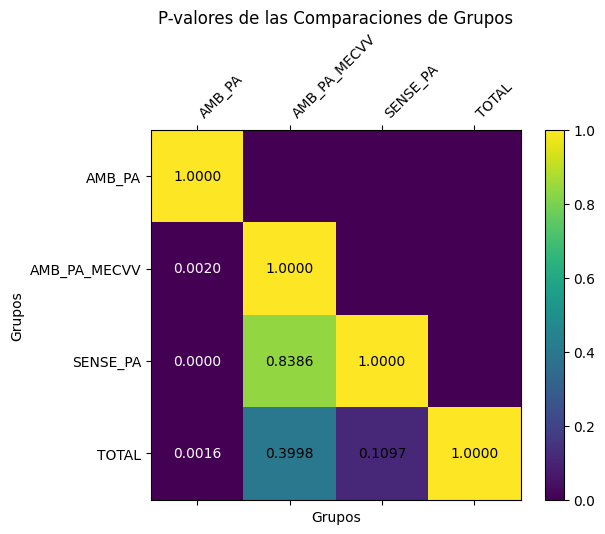

In [13]:
test_indepe_plot({'AMB_PA': AMB_PA['edat'], 'AMB_PA_MECVV': AMB_PA_MECVV['edat'], 'SENSE_PA': SENSE_PA['edat'], 'TOTAL': TOTAL['edat']})

## Sexe

In [14]:
sexe_AMB_PA = AMB_PA['sexe'].value_counts()
sexe_AMB_PA_MECVV = AMB_PA_MECVV['sexe'].value_counts()
sexe_SENSE_PA = SENSE_PA['sexe'].value_counts()
sexe_TOTAL = TOTAL['sexe'].value_counts()

In [15]:
if 'F' in sexe_AMB_PA:
    percent_female1 = (sexe_AMB_PA['F'] / len(AMB_PA)) * 100
    print(f"Percentatge de sexe femení en AMB_PA: {percent_female1:.2f}%")
else:
    print("No hi ha dades de sexe femení en AMB_PA")

Percentatge de sexe femení en AMB_PA: 46.57%


In [16]:
if 'F' in sexe_AMB_PA_MECVV:
    percent_female2 = (sexe_AMB_PA_MECVV['F'] / len(AMB_PA)) * 100
    print(f"Percentatge de sexe femení en AMB_PA_MECVV: {percent_female2:.2f}%")
else:
    print("No hi ha dades de sexe femení en AMB_PA_MECVV")

Percentatge de sexe femení en AMB_PA_MECVV: 14.26%


In [17]:
if 'F' in sexe_SENSE_PA:
    percent_female3 = (sexe_SENSE_PA['F'] / len(SENSE_PA)) * 100
    print(f"Percentatge de sexe femení en SENSE_PA: {percent_female3:.2f}%")
else:
    print("No hi ha dades de sexe femení en SENSE_PA")


Percentatge de sexe femení en SENSE_PA: 48.10%


In [18]:
if 'F' in sexe_TOTAL:
    percent_female4 = (sexe_TOTAL['F'] / len(TOTAL)) * 100
    print(f"Percentatge de sexe femení en TOTAL: {percent_female4:.2f}%")
else:
    print("No hi ha dades de sexe femení en TOTAL")

Percentatge de sexe femení en TOTAL: 46.58%


#### Comparació distributiva

##### Normalitat i p-valor

Al ser una variable categòrica no té sentit comprovar la seva normalitat. Realitzaré directament el test Xi-quadrat

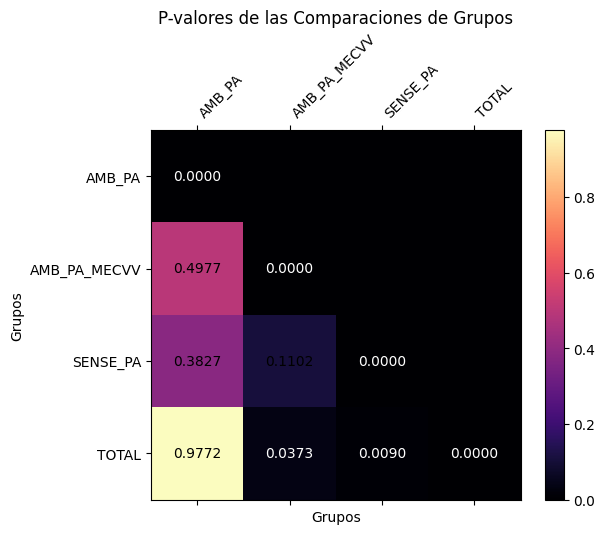

In [19]:
test_indepe_bin_plot({'AMB_PA': AMB_PA['sexe'],'AMB_PA_MECVV': AMB_PA_MECVV['sexe'], 'SENSE_PA': SENSE_PA['sexe'], 'TOTAL': TOTAL['sexe']})

## Admissions

In [20]:
Mitjana_ingresos = AMB_PA['Admissions'].mean()
desviacio_estandard_ingresos = AMB_PA['Admissions'].std()

resultat = f"{Mitjana_ingresos:.2f} ± {desviacio_estandard_ingresos:.2f}"
print("Mitjana ± Desviació Estàndard del nombre d'ingressos:", resultat)

Mitjana ± Desviació Estàndard del nombre d'ingressos: 5.23 ± 3.88


In [21]:
Mitjana_ingresos = AMB_PA_MECVV['Admissions'].mean()
desviacio_estandard_ingresos = AMB_PA_MECVV['Admissions'].std()

resultat = f"{Mitjana_ingresos:.2f} ± {desviacio_estandard_ingresos:.2f}"
print("Mitjana ± Desviació Estàndard del nombre d'ingressos:", resultat)

Mitjana ± Desviació Estàndard del nombre d'ingressos: 3.98 ± 2.88


In [22]:
Mitjana_ingresos = SENSE_PA['Admissions'].mean()
desviacio_estandard_ingresos = SENSE_PA['Admissions'].std()

resultat = f"{Mitjana_ingresos:.2f} ± {desviacio_estandard_ingresos:.2f}"
print("Mitjana ± Desviació Estàndard del nombre d'ingressos:", resultat)

Mitjana ± Desviació Estàndard del nombre d'ingressos: 6.63 ± 4.58


In [23]:
Mitjana_ingresos = TOTAL['Admissions'].mean()
desviacio_estandard_ingresos = TOTAL['Admissions'].std()

resultat = f"{Mitjana_ingresos:.2f} ± {desviacio_estandard_ingresos:.2f}"
print("Mitjana ± Desviació Estàndard del nombre d'ingressos:", resultat)

Mitjana ± Desviació Estàndard del nombre d'ingressos: 3.08 ± 3.52


#### Comparació distributiva

##### Normalitat i p-valor

C:\Users\jmiro\GitHub\PRACTICUM\venv\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 21185.
  res = hypotest_fun_out(*samples, **kwds)


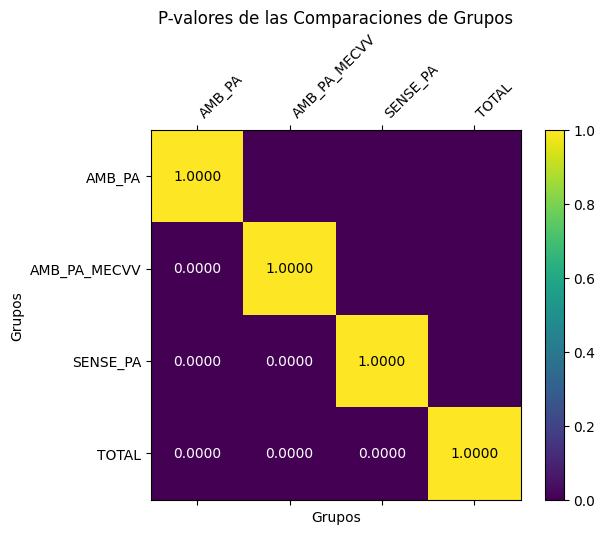

In [24]:
test_indepe_plot({'AMB_PA': AMB_PA['Admissions'], 'AMB_PA_MECVV': AMB_PA_MECVV['Admissions'], 'SENSE_PA': SENSE_PA['Admissions'], 'TOTAL': TOTAL['Admissions']})

## Urgències

In [25]:
Mitjana_urgencies = AMB_PA['Emergències'].mean()
desviacio_estandard_urgencies = AMB_PA['Emergències'].std()

resultat = f"{Mitjana_urgencies:.2f} ± {desviacio_estandard_urgencies:.2f}"
print("Mitjana ± Desviació Estàndard del nombre d'urgències:", resultat)

Mitjana ± Desviació Estàndard del nombre d'urgències: 11.68 ± 9.28


## Disfàgia

In [26]:
disf_AMB_PA= (AMB_PA['DO diagnosticada'] == 1.0).mean() * 100
print(f"Percentatge de disfàgia: {disf_AMB_PA:.2f}%")

Percentatge de disfàgia: 61.39%


In [27]:
disf_AMB_PA_MECVV = (AMB_PA_MECVV['DO diagnosticada'] == 1.0).mean() * 100
print(f"Percentatge de disfàgia: {disf_AMB_PA_MECVV:.2f}%")

Percentatge de disfàgia: 39.67%


In [28]:
disf_SENSE_PA= (SENSE_PA['DO diagnosticada'] == 1.0).mean() * 100
print(f"Percentatge de disfàgia: {disf_SENSE_PA:.2f}%")

Percentatge de disfàgia: 40.40%


In [29]:
disf_TOTAL= (TOTAL['DO diagnosticada'] == 1.0).mean() * 100
print(f"Percentatge de disfàgia: {disf_TOTAL:.2f}%")

Percentatge de disfàgia: 13.85%


#### Comparació distributiva

##### Normalitat i p-valor

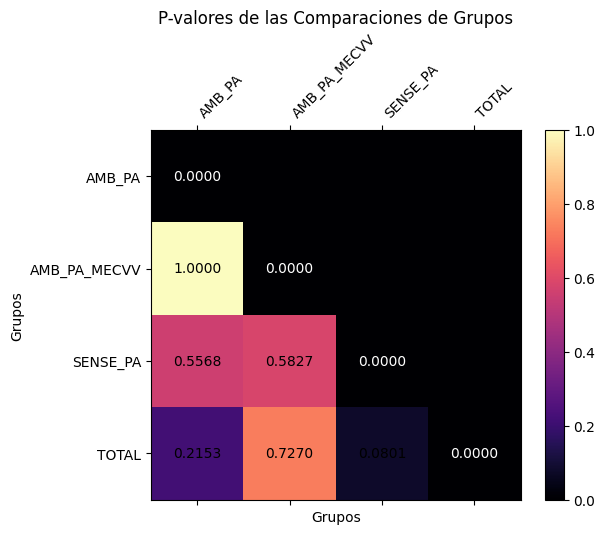

In [30]:
test_indepe_bin_plot({'AMB_PA': AMB_PA['DO diagnosticada'], 'AMB_PA_MECVV': AMB_PA_MECVV['DO diagnosticada'], 'SENSE_PA': SENSE_PA['DO diagnosticada'], 'TOTAL': TOTAL['DO diagnosticada']})

Al ser una variable categòrica no té sentit comprovar la seva normalitat. Realitzaré directament el test Xi-quadrat

## Index de Barthel

### Mitjana

In [31]:
Mitjana_barthel = AMB_PA['Barthel resultats'].mean()
desviacio_estandard_barthel = AMB_PA['Barthel resultats'].std()

resultat = f"{Mitjana_barthel:.2f} ± {desviacio_estandard_barthel:.2f}"
print("Mitjana ± Desviació Estàndard del Barthel:", resultat)

Mitjana ± Desviació Estàndard del Barthel: 36.35 ± 33.36


In [32]:
Mitjana_barthel = AMB_PA_MECVV['Barthel resultats'].mean()
desviacio_estandard_barthel = AMB_PA_MECVV['Barthel resultats'].std()

resultat = f"{Mitjana_barthel:.2f} ± {desviacio_estandard_barthel:.2f}"
print("Mitjana ± Desviació Estàndard del Barthel:", resultat)

Mitjana ± Desviació Estàndard del Barthel: 45.62 ± 35.16


In [33]:
Mitjana_barthel = SENSE_PA['Barthel resultats'].mean()
desviacio_estandard_barthel = SENSE_PA['Barthel resultats'].std()

resultat = f"{Mitjana_barthel:.2f} ± {desviacio_estandard_barthel:.2f}"
print("Mitjana ± Desviació Estàndard del Barthel:", resultat)

Mitjana ± Desviació Estàndard del Barthel: 54.82 ± 33.16


#### Comparació distributiva

##### Normalitat i p-valor

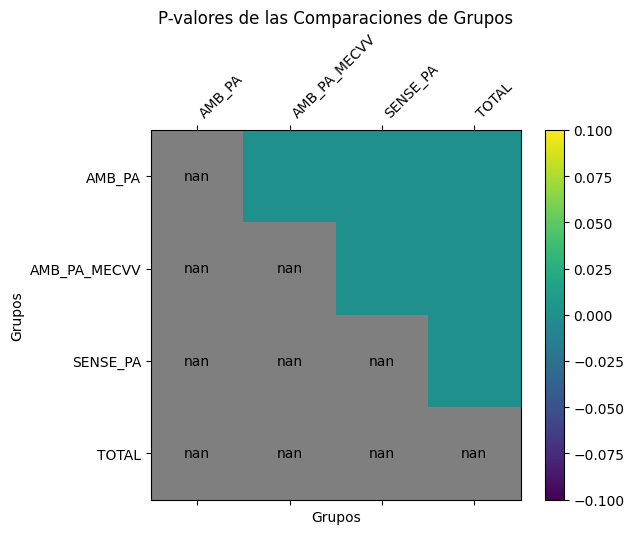

In [34]:
test_indepe_plot({'AMB_PA': AMB_PA['Barthel resultats'], 'AMB_PA_MECVV': AMB_PA_MECVV['Barthel resultats'], 'SENSE_PA': SENSE_PA['Barthel resultats'], 'TOTAL': TOTAL['Barthel resultats']})

NORMALITAT: Només el tercer grup (SENSE_PA) segueix una distribució normal

### Valors de dependència

##### AMB_PA

In [35]:
indepe_AMB_PA = (AMB_PA['Barthel resultats'] == 100.0).mean() * 100
print(f"Percentatge de indepe_AMB_PA: {indepe_AMB_PA:.2f}%")

Percentatge de indepe_AMB_PA: 6.30%


In [36]:
mod_AMB_PA = (AMB_PA['Barthel resultats'].between(61, 95)).mean() * 100
print(f"Percentatge de mod_AMB_PA: {mod_AMB_PA:.2f}%")

Percentatge de mod_AMB_PA: 18.15%


In [37]:
sev_AMB_PA = (AMB_PA['Barthel resultats'].between(21, 60)).mean() * 100
print(f"Percentatge de sev_AMB_PA: {sev_AMB_PA:.2f}%")

Percentatge de sev_AMB_PA: 29.54%


In [38]:
total_AMB_PA = (AMB_PA['Barthel resultats'] <= 20.0 ).mean() * 100
print(f"Percentatge de total_AMB_PA: {total_AMB_PA:.2f}%")

Percentatge de total_AMB_PA: 43.06%


##### AMB_PA_MECVV

In [39]:
indepe_AMB_PA_MECVV = (AMB_PA_MECVV['Barthel resultats'] == 100.0).mean() * 100
print(f"Percentatge de indepe_AMB_PA_MECVV: {indepe_AMB_PA_MECVV:.2f}%")

Percentatge de indepe_AMB_PA_MECVV: 8.00%


In [40]:
mod_AMB_PA_MECVV = (AMB_PA_MECVV['Barthel resultats'].between(61,95)).mean() * 100
print(f"Percentatge de mod_AMB_PA_MECVV: {mod_AMB_PA_MECVV:.2f}%")

Percentatge de mod_AMB_PA_MECVV: 26.67%


In [41]:
sev_AMB_PA_MECVV = (AMB_PA_MECVV['Barthel resultats'].between(21,60)).mean() * 100
print(f"Percentatge de sev_AMB_PA_MECVV: {sev_AMB_PA_MECVV:.2f}%")

Percentatge de sev_AMB_PA_MECVV: 28.67%


In [42]:
total_AMB_PA_MECVV = (AMB_PA_MECVV['Barthel resultats'] <= 20.0).mean() * 100
print(f"Percentatge de total_AMB_PA_MECVV: {total_AMB_PA_MECVV:.2f}%")

Percentatge de total_AMB_PA_MECVV: 32.67%


##### SENSE_PA

In [43]:
indepe_SENSE_PA = (SENSE_PA['Barthel resultats'] == 100.0).mean() * 100
print(f"Percentatge de indepe_SENSE_PA: {indepe_SENSE_PA:.2f}%")

Percentatge de indepe_SENSE_PA: 12.46%


In [44]:
mod_SENSE_PA = (SENSE_PA['Barthel resultats'].between(61,95)).mean() * 100
print(f"Percentatge de mod_SENSE_PA: {mod_SENSE_PA:.2f}%")

Percentatge de mod_SENSE_PA: 30.45%


In [45]:
sev_SENSE_PA = (SENSE_PA['Barthel resultats'].between(21,60)).mean() * 100
print(f"Percentatge de sev_SENSE_PA: {sev_SENSE_PA:.2f}%")

Percentatge de sev_SENSE_PA: 32.70%


In [46]:
total_SENSE_PA = (SENSE_PA['Barthel resultats'] <= 20).mean() * 100
print(f"Percentatge de total_SENSE_PA: {total_SENSE_PA:.2f}%")

Percentatge de total_SENSE_PA: 21.19%


#### P-valor

##### Independència

In [47]:
contingency_table_12 = pd.crosstab(index=AMB_PA['Barthel resultats'] == 100.0, columns=AMB_PA_MECVV['Barthel resultats'] == 100.0)

chi2_12, p_value_12, dof_12, expected_12 = chi2_contingency(contingency_table_12)

print("Estadístic xi-quadrat entre AMB_PA i AMB_PA_MECVV:", chi2_12)
print("P-valor entre AMB_PA i AMB_PA_MECVV:", p_value_12)

if p_value_12 < 0.05:
    print("Hi ha diferències significatives entre les distribucions de Barthel en AMB_PA i AMB_PA_MECVV.")
else:
    print("No hi ha diferències significatives entre les distribucions de Barthel en AMB_PA i AMB_PA_MECVV.")

Estadístic xi-quadrat entre AMB_PA i AMB_PA_MECVV: 65.11452097773578
P-valor entre AMB_PA i AMB_PA_MECVV: 7.066940019431684e-16
Hi ha diferències significatives entre les distribucions de Barthel en AMB_PA i AMB_PA_MECVV.


In [48]:
contingency_table_13 = pd.crosstab(index=AMB_PA['Barthel resultats'] == 100.0, columns=SENSE_PA['Barthel resultats'] == 100.0)

chi2_13, p_value_13, dof_13, expected_13 = chi2_contingency(contingency_table_13)

print("Estadístic xi-quadrat entre AMB_PA i SENSE_PA:", chi2_13)
print("P-valor entre AMB_PA i SENSE_PA:", p_value_13)

if p_value_13 < 0.05:
    print("Hi ha diferències significatives entre les distribucions de Barthel en AMB_PA i SENSE_PA.")
else:
    print("No hi ha diferències significatives entre les distribucions de Barthel en AMB_PA i SENSE_PA.")

Estadístic xi-quadrat entre AMB_PA i SENSE_PA: 213.87087473429685
P-valor entre AMB_PA i SENSE_PA: 1.9651080657534e-48
Hi ha diferències significatives entre les distribucions de Barthel en AMB_PA i SENSE_PA.


In [49]:
contingency_table_23 = pd.crosstab(index=AMB_PA_MECVV['Barthel resultats'] == 100.0, columns=SENSE_PA['Barthel resultats'] == 100.0)

chi2_23, p_value_23, dof_23, expected_23 = chi2_contingency(contingency_table_23)

print("Estadístic xi-quadrat entre AMB_PA_MECVVV i SENSE_PA:", chi2_23)
print("P-valor entre AMB_PA_MECVV i SENSE_PA:", p_value_23)

if p_value_23 < 0.05:
    print("Hi ha diferències significatives entre les distribucions de Barthel en AMB_PA_MECVV i SENSE_PA.")
else:
    print("No hi ha diferències significatives entre les distribucions Barthel en AMB_PA_MECVV i SENSE_PA.")

ValueError: No data; `observed` has size 0.

In [ ]:
contingency_table_14 = pd.crosstab(index=AMB_PA['Barthel resultats'] == 100.0, columns=TOTAL['Barthel resultats'] == 100.0)

chi2_14, p_value_14, dof_14, expected_14 = chi2_contingency(contingency_table_14)

print("Estadístic xi-quadrat entre AMB_PA i TOTAL:", chi2_14)
print("P-valor entre AMB_PA i TOTAL:", p_value_14)

if p_value_14 < 0.05:
    print("Hi ha diferències significatives entre les distribucions de Barthel en AMB_PA i TOTAL.")
else:
    print("No hi ha diferències significatives entre les distribucions de Barthel en AMB_PA i TOTAL.")

In [50]:
contingency_table_24 = pd.crosstab(index=AMB_PA_MECVV['Barthel resultats'] == 100.0, columns=TOTAL['Barthel resultats'] == 100.0)

chi2_24, p_value_24, dof_24, expected_24 = chi2_contingency(contingency_table_24)

print("Estadístic xi-quadrat entre AMB_PA_MECVVV i TOTAL:", chi2_24)
print("P-valor entre AMB_PA_MECVV i TOTAL:", p_value_24)

if p_value_24 < 0.05:
    print("Hi ha diferències significatives entre les distribucions de Barthel en AMB_PA_MECVV i TOTAL.")
else:
    print("No hi ha diferències significatives entre les distribucions de Barthel en AMB_PA_MECVV i TOTAL.")

Estadístic xi-quadrat entre AMB_PA_MECVVV i TOTAL: 286.5668813011972
P-valor entre AMB_PA_MECVV i TOTAL: 2.783664757013142e-64
Hi ha diferències significatives entre les distribucions de Barthel en AMB_PA_MECVV i TOTAL.


In [51]:
contingency_table_34 = pd.crosstab(index=SENSE_PA['Barthel resultats'] == 100.0, columns=TOTAL['Barthel resultats'] == 100.0)

chi2_34, p_value_34, dof_34, expected_34 = chi2_contingency(contingency_table_34)

print("Estadístic xi-quadrat entre SENSE_PA i TOTAL:", chi2_34)
print("P-valor entre SENSE_PA i TOTAL:", p_value_34)

if p_value_34 < 0.05:
    print("Hi ha diferències significatives entre les distribucions de Barthel en SENSE_PA i TOTAL.")
else:
    print("No hi ha diferències significatives entre les distribucions de Barthel en SENSE_PA i TOTAL.")

Estadístic xi-quadrat entre SENSE_PA i TOTAL: 1146.8481153265495
P-valor entre SENSE_PA i TOTAL: 2.172227021619026e-251
Hi ha diferències significatives entre les distribucions de Barthel en SENSE_PA i TOTAL.


##### Moderada

In [52]:
contingency_table_12 = pd.crosstab(index=AMB_PA['Barthel resultats'].between(61, 95), columns=AMB_PA_MECVV['Barthel resultats'].between(61, 95))

chi2_12, p_value_12, dof_12, expected_12 = chi2_contingency(contingency_table_12)

print("Estadístic xi-quadrat entre AMB_PA i AMB_PA_MECVV:", chi2_12)
print("P-valor entre AMB_PA i AMB_PA_MECVV:", p_value_12)

if p_value_12 < 0.05:
    print("Hi ha diferències significatives entre les distribucions de Barthel en AMB_PA i AMB_PA_MECVV.")
else:
    print("No hi ha diferències significatives entre les distribucions de Barthel en AMB_PA i AMB_PA_MECVV.")

Estadístic xi-quadrat entre AMB_PA i AMB_PA_MECVV: 86.72239487449356
P-valor entre AMB_PA i AMB_PA_MECVV: 1.2487472663138867e-20
Hi ha diferències significatives entre les distribucions de Barthel en AMB_PA i AMB_PA_MECVV.


In [53]:
contingency_table_13 = pd.crosstab(index=AMB_PA['Barthel resultats'].between(61, 95), columns=SENSE_PA['Barthel resultats'].between(61, 95))

chi2_13, p_value_13, dof_13, expected_13 = chi2_contingency(contingency_table_13)

print("Estadístic xi-quadrat entre AMB_PA i SENSE_PA:", chi2_13)
print("P-valor entre AMB_PA i SENSE_PA:", p_value_13)

if p_value_13 < 0.05:
    print("Hi ha diferències significatives entre les distribucions de Barthel en AMB_PA i SENSE_PA.")
else:
    print("No hi ha diferències significatives entre les distribucions de Barthel en AMB_PA i SENSE_PA.")

Estadístic xi-quadrat entre AMB_PA i SENSE_PA: 221.97761964537108
P-valor entre AMB_PA i SENSE_PA: 3.349830935215533e-50
Hi ha diferències significatives entre les distribucions de Barthel en AMB_PA i SENSE_PA.


In [54]:
contingency_table_23 = pd.crosstab(index=AMB_PA_MECVV['Barthel resultats'].between(61, 95), columns=SENSE_PA['Barthel resultats'].between(61, 95))

chi2_23, p_value_23, dof_23, expected_23 = chi2_contingency(contingency_table_23)

print("Estadístic xi-quadrat entre AMB_PA_MECVV i SENSE_PA:", chi2_23)
print("P-valor entre AMB_PA_MECVV i SENSE_PA:", p_value_23)

if p_value_23 < 0.05:
    print("Hi ha diferències significatives entre les distribucions de Barthel en AMB_PA_MECVV i SENSE_PA.")
else:
    print("No hi ha diferències significatives entre les distribucions de Barthel en AMB_PA_MECVV i SENSE_PA.")

ValueError: No data; `observed` has size 0.

In [55]:
contingency_table_14 = pd.crosstab(index=AMB_PA['Barthel resultats'].between(61, 95), columns=TOTAL['Barthel resultats'].between(61, 95))

chi2_14, p_value_14, dof_14, expected_14 = chi2_contingency(contingency_table_14)

print("Estadístic xi-quadrat entre AMB_PA i TOTAL:", chi2_14)
print("P-valor entre AMB_PA i TOTAL:", p_value_14)

if p_value_14 < 0.05:
    print("Hi ha diferències significatives entre les distribucions de Barthel en AMB_PA i TOTAL.")
else:
    print("No hi ha diferències significatives entre les distribucions de Barthel en AMB_PA i TOTAL.")

Estadístic xi-quadrat entre AMB_PA i TOTAL: 1073.2785669230507
P-valor entre AMB_PA i TOTAL: 2.1217809637491967e-235
Hi ha diferències significatives entre les distribucions de Barthel en AMB_PA i TOTAL.


In [56]:
contingency_table_24 = pd.crosstab(index=AMB_PA_MECVV['Barthel resultats'].between(61, 95), columns=TOTAL['Barthel resultats'].between(61, 95))

chi2_24, p_value_24, dof_24, expected_24 = chi2_contingency(contingency_table_24)

print("Estadístic xi-quadrat entre AMB_PA_MECVV i TOTAL:", chi2_24)
print("P-valor entre AMB_PA_MECVV i TOTAL:", p_value_24)

if p_value_24 < 0.05:
    print("Hi ha diferències significatives entre les distribucions de Barthel en AMB_PA_MECVV i TOTAL.")
else:
    print("No hi ha diferències significatives entre les distribucions de Barthel en AMB_PA_MECVV i TOTAL.")

Estadístic xi-quadrat entre AMB_PA_MECVV i TOTAL: 294.90815470041326
P-valor entre AMB_PA_MECVV i TOTAL: 4.2378363336207594e-66
Hi ha diferències significatives entre les distribucions de Barthel en AMB_PA_MECVV i TOTAL.


In [57]:
contingency_table_34 = pd.crosstab(index=SENSE_PA['Barthel resultats'].between(61, 95), columns=TOTAL['Barthel resultats'].between(61, 95))

chi2_34, p_value_34, dof_34, expected_34 = chi2_contingency(contingency_table_34)

print("Estadístic xi-quadrat entre SENSE_PA i TOTAL:", chi2_34)
print("P-valor entre SENSE_PA i TOTAL:", p_value_34)

if p_value_34 < 0.05:
    print("Hi ha diferències significatives entre les distribucions de Barthel en SENSE_PA i TOTAL.")
else:
    print("No hi ha diferències significatives entre les distribucions de Barthel en SENSE_PA i TOTAL.")

Estadístic xi-quadrat entre SENSE_PA i TOTAL: 1151.2829200221759
P-valor entre SENSE_PA i TOTAL: 2.360820578987827e-252
Hi ha diferències significatives entre les distribucions de Barthel en SENSE_PA i TOTAL.


##### Severa

In [58]:
contingency_table_12 = pd.crosstab(index=AMB_PA['Barthel resultats'].between(21,60), columns=AMB_PA_MECVV['Barthel resultats'].between(21,60))

chi2_12, p_value_12, dof_12, expected_12 = chi2_contingency(contingency_table_12)

print("Estadístic xi-quadrat entre AMB_PA i AMB_PA_MECVV:", chi2_12)
print("P-valor entre AMB_PA i AMB_PA_MECVV:", p_value_12)

if p_value_12 < 0.05:
    print("Hi ha diferències significatives entre les distribucions de Barthel en AMB_PA i AMB_PA_MECVV.")
else:
    print("No hi ha diferències significatives entre les distribucions de Barthel en AMB_PA i AMB_PA_MECVV.")

Estadístic xi-quadrat entre AMB_PA i AMB_PA_MECVV: 89.62828178239283
P-valor entre AMB_PA i AMB_PA_MECVV: 2.8738637498111904e-21
Hi ha diferències significatives entre les distribucions de Barthel en AMB_PA i AMB_PA_MECVV.


In [59]:
contingency_table_13 = pd.crosstab(index=AMB_PA['Barthel resultats'].between(21,60), columns=SENSE_PA['Barthel resultats'].between(21,60))

chi2_13, p_value_13, dof_13, expected_13 = chi2_contingency(contingency_table_13)

print("Estadístic xi-quadrat entre AMB_PA i SENSE_PA:", chi2_13)
print("P-valor entre AMB_PA i SENSE_PA:", p_value_13)

if p_value_13 < 0.05:
    print("Hi ha diferències significatives entre les distribucions de Barthel en AMB_PA i SENSE_PA.")
else:
    print("No hi ha diferències significatives entre les distribucions de Barthel en AMB_PA i SENSE_PA.")

Estadístic xi-quadrat entre AMB_PA i SENSE_PA: 224.8431334999931
P-valor entre AMB_PA i SENSE_PA: 7.94371466136837e-51
Hi ha diferències significatives entre les distribucions de Barthel en AMB_PA i SENSE_PA.


In [60]:
contingency_table_23 = pd.crosstab(index=AMB_PA_MECVV['Barthel resultats'].between(21,60), columns=SENSE_PA['Barthel resultats'].between(21,60))

chi2_23, p_value_23, dof_23, expected_23 = chi2_contingency(contingency_table_23)

print("Estadístic xi-quadrat entre AMB_PA_MECVV i SENSE_PA:", chi2_23)
print("P-valor entre AMB_PA_MECVV i SENSE_PA:", p_value_23)

if p_value_23 < 0.05:
    print("Hi ha diferències significatives entre les distribucions de Barthel en AMB_PA_MECVV i SENSE_PA.")
else:
    print("No hi ha diferències significatives entre les distribucions de Barthel en AMB_PA_MECVV i SENSE_PA.")

ValueError: No data; `observed` has size 0.

In [61]:
contingency_table_14 = pd.crosstab(index=AMB_PA['Barthel resultats'].between(21,60), columns=TOTAL['Barthel resultats'].between(21,60))

chi2_14, p_value_14, dof_14, expected_14 = chi2_contingency(contingency_table_14)

print("Estadístic xi-quadrat entre AMB_PA i TOTAL:", chi2_14)
print("P-valor entre AMB_PA i TOTAL:", p_value_14)

if p_value_14 < 0.05:
    print("Hi ha diferències significatives entre les distribucions de Barthel en AMB_PA i TOTAL.")
else:
    print("No hi ha diferències significatives entre les distribucions de Barthel en AMB_PA i TOTAL.")

Estadístic xi-quadrat entre AMB_PA i TOTAL: 1075.2005787081398
P-valor entre AMB_PA i TOTAL: 8.108736652835172e-236
Hi ha diferències significatives entre les distribucions de Barthel en AMB_PA i TOTAL.


In [62]:
contingency_table_24 = pd.crosstab(index=AMB_PA_MECVV['Barthel resultats'].between(21,60), columns=TOTAL['Barthel resultats'].between(21,60))

chi2_24, p_value_24, dof_24, expected_24 = chi2_contingency(contingency_table_24)

print("Estadístic xi-quadrat entre AMB_PA_MECVV i TOTAL:", chi2_24)
print("P-valor entre AMB_PA_MECVV i TOTAL:", p_value_24)

if p_value_24 < 0.05:
    print("Hi ha diferències significatives entre les distribucions de Barthel en AMB_PA_MECVV i TOTAL.")
else:
    print("No hi ha diferències significatives entre les distribucions de Barthel en AMB_PA_MECVV i TOTAL.")

Estadístic xi-quadrat entre AMB_PA_MECVV i TOTAL: 295.12968746434973
P-valor entre AMB_PA_MECVV i TOTAL: 3.792075544867029e-66
Hi ha diferències significatives entre les distribucions de Barthel en AMB_PA_MECVV i TOTAL.


In [63]:
contingency_table_34 = pd.crosstab(index=SENSE_PA['Barthel resultats'].between(21,60), columns=TOTAL['Barthel resultats'].between(21,60))

chi2_34, p_value_34, dof_34, expected_34 = chi2_contingency(contingency_table_34)

print("Estadístic xi-quadrat entre SENSE_PA i TOTAL:", chi2_34)
print("P-valor entre SENSE_PA i TOTAL:", p_value_34)

if p_value_34 < 0.05:
    print("Hi ha diferències significatives entre les distribucions de Barthel en SENSE_PA i TOTAL.")
else:
    print("No hi ha diferències significatives entre les distribucions de Barthel en SENSE_PA i TOTAL.")

Estadístic xi-quadrat entre SENSE_PA i TOTAL: 1151.4604032656914
P-valor entre SENSE_PA i TOTAL: 2.1601781570587477e-252
Hi ha diferències significatives entre les distribucions de Barthel en SENSE_PA i TOTAL.


##### Total

In [64]:
contingency_table_12 = pd.crosstab(index=AMB_PA['Barthel resultats'] <= 20.0, columns=AMB_PA_MECVV['Barthel resultats'] <= 20.0)

chi2_12, p_value_12, dof_12, expected_12 = chi2_contingency(contingency_table_12)

print("Estadístic xi-quadrat entre AMB_PA i AMB_PA_MECVV:", chi2_12)
print("P-valor entre AMB_PA i AMB_PA_MECVV:", p_value_12)

if p_value_12 < 0.05:
    print("Hi ha diferències significatives entre les distribucions de Barthel en AMB_PA i AMB_PA_MECVV.")
else:
    print("No hi ha diferències significatives entre les distribucions de Barthel en AMB_PA i AMB_PA_MECVV.")

Estadístic xi-quadrat entre AMB_PA i AMB_PA_MECVV: 90.96739516495586
P-valor entre AMB_PA i AMB_PA_MECVV: 1.4605913595535356e-21
Hi ha diferències significatives entre les distribucions de Barthel en AMB_PA i AMB_PA_MECVV.


In [65]:
contingency_table_13 = pd.crosstab(index=AMB_PA['Barthel resultats'] <= 20.0, columns=SENSE_PA['Barthel resultats'] <= 20.0)

chi2_13, p_value_13, dof_13, expected_13 = chi2_contingency(contingency_table_13)

print("Estadístic xi-quadrat entre AMB_PA i SENSE_PA:", chi2_13)
print("P-valor entre AMB_PA i SENSE_PA:", p_value_13)

if p_value_13 < 0.05:
    print("Hi ha diferències significatives entre les distribucions de Barthel en AMB_PA i SENSE_PA.")
else:
    print("No hi ha diferències significatives entre les distribucions de Barthel en AMB_PA i SENSE_PA.")

Estadístic xi-quadrat entre AMB_PA i SENSE_PA: 224.64643290862045
P-valor entre AMB_PA i SENSE_PA: 8.768494277278572e-51
Hi ha diferències significatives entre les distribucions de Barthel en AMB_PA i SENSE_PA.


In [66]:
contingency_table_23 = pd.crosstab(index=AMB_PA_MECVV['Barthel resultats'] <= 20.0, columns=SENSE_PA['Barthel resultats'] <= 20.0)

chi2_23, p_value_23, dof_23, expected_23 = chi2_contingency(contingency_table_23)

print("Estadístic xi-quadrat entre AMB_PA_MECVV i SENSE_PA:", chi2_23)
print("P-valor entre AMB_PA_MECVV i SENSE_PA:", p_value_23)

if p_value_23 < 0.05:
    print("Hi ha diferències significatives entre les distribucions de Barthel en AMB_PA_MECVV i SENSE_PA.")
else:
    print("No hi ha diferències significatives entre les distribucions de Barthel en AMB_PA_MECVV i SENSE_PA.")

ValueError: No data; `observed` has size 0.

In [67]:
contingency_table_14 = pd.crosstab(index=AMB_PA['Barthel resultats'] <= 20.0, columns=TOTAL['Barthel resultats'] <= 20.0)

chi2_14, p_value_14, dof_14, expected_14 = chi2_contingency(contingency_table_14)

print("Estadístic xi-quadrat entre AMB_PA i TOTAL:", chi2_14)
print("P-valor entre AMB_PA i TOTAL:", p_value_14)

if p_value_14 < 0.05:
    print("Hi ha diferències significatives entre les distribucions de Barthel en AMB_PA i TOTAL.")
else:
    print("No hi ha diferències significatives entre les distribucions de Barthel en AMB_PA i TOTAL.")

Estadístic xi-quadrat entre AMB_PA i TOTAL: 1075.925172630879
P-valor entre AMB_PA i TOTAL: 5.642396561751156e-236
Hi ha diferències significatives entre les distribucions de Barthel en AMB_PA i TOTAL.


In [68]:
contingency_table_24 = pd.crosstab(index=AMB_PA_MECVV['Barthel resultats'] <= 20.0, columns=TOTAL['Barthel resultats'] <= 20.0)

chi2_24, p_value_24, dof_24, expected_24 = chi2_contingency(contingency_table_24)

print("Estadístic xi-quadrat entre AMB_PA_MECVV i TOTAL:", chi2_24)
print("P-valor entre AMB_PA_MECVV i TOTAL:", p_value_24)

if p_value_24 < 0.05:
    print("Hi ha diferències significatives entre les distribucions de Barthel en AMB_PA_MECVV i TOTAL.")
else:
    print("No hi ha diferències significatives entre les distribucions de Barthel en AMB_PA_MECVV i TOTAL.")

Estadístic xi-quadrat entre AMB_PA_MECVV i TOTAL: 295.4708515849337
P-valor entre AMB_PA_MECVV i TOTAL: 3.195544952373863e-66
Hi ha diferències significatives entre les distribucions de Barthel en AMB_PA_MECVV i TOTAL.


In [69]:
contingency_table_34 = pd.crosstab(index=SENSE_PA['Barthel resultats'] <= 20.0, columns=TOTAL['Barthel resultats'] <= 20.0)

chi2_34, p_value_34, dof_34, expected_34 = chi2_contingency(contingency_table_34)

print("Estadístic xi-quadrat entre SENSE_PA i TOTAL:", chi2_34)
print("P-valor entre SENSE_PA i TOTAL:", p_value_34)

if p_value_34 < 0.05:
    print("Hi ha diferències significatives entre les distribucions de Barthel en SENSE_PA i TOTAL.")
else:
    print("No hi ha diferències significatives entre les distribucions de Barthel en SENSE_PA i TOTAL.")

Estadístic xi-quadrat entre SENSE_PA i TOTAL: 1150.0204499672773
P-valor entre SENSE_PA i TOTAL: 4.440610774487868e-252
Hi ha diferències significatives entre les distribucions de Barthel en SENSE_PA i TOTAL.


## Index del MNA

Primer convertiré la columna a tipus numèric ja que els valors que conté són de tipus objecte i amb aquest tipus no puc calcular la mitjana ni la desviació estàndard.

In [70]:
AMB_PA.loc[:, 'MNA resultats'] = pd.to_numeric(AMB_PA['MNA resultats'], errors='coerce')
AMB_PA_MECVV.loc[:, 'MNA resultats'] = pd.to_numeric(AMB_PA_MECVV['MNA resultats'], errors='coerce')
SENSE_PA.loc[:, 'MNA resultats'] = pd.to_numeric(SENSE_PA['MNA resultats'], errors='coerce')
TOTAL.loc[:, 'MNA resultats'] = pd.to_numeric(TOTAL['MNA resultats'], errors='coerce')

### Mitjana

In [71]:
Mitjana_mna = AMB_PA['MNA resultats'].mean()
desviacio_estandard_mna = AMB_PA['MNA resultats'].std()

resultat = f"{Mitjana_mna:.2f} ± {desviacio_estandard_mna:.2f}"
print("Mitjana ± Desviació Estándard del mna:", resultat)

Mitjana ± Desviació Estándard del mna: 6.88 ± 6.91


In [72]:
Mitjana_mna = AMB_PA_MECVV['MNA resultats'].mean()
desviacio_estandard_mna = AMB_PA_MECVV['MNA resultats'].std()

resultat = f"{Mitjana_mna:.2f} ± {desviacio_estandard_mna:.2f}"
print("Mitjana ± Desviació Estándard del mna:", resultat)

Mitjana ± Desviació Estándard del mna: 12.84 ± 10.58


In [73]:
Mitjana_mna = SENSE_PA['MNA resultats'].mean()
desviacio_estandard_mna = SENSE_PA['MNA resultats'].std()

resultat = f"{Mitjana_mna:.2f} ± {desviacio_estandard_mna:.2f}"
print("Mitjana ± Desviació Estàndard del mna:", resultat)

Mitjana ± Desviació Estàndard del mna: 10.73 ± 9.13


In [74]:
Mitjana_mna = TOTAL['MNA resultats'].mean()
desviacio_estandard_mna = TOTAL['MNA resultats'].std()

resultat = f"{Mitjana_mna:.2f} ± {desviacio_estandard_mna:.2f}"
print("Mitjana ± Desviació Estàndard del mna:", resultat)

Mitjana ± Desviació Estàndard del mna: 8.44 ± 6.94


#### Comparació distributiva

##### Normalitat i p-valor

NORMALITAT: Tots els grups segueixen una distribució normal

In [75]:
t_stat_12, p_val_12 = ttest_ind(AMB_PA['MNA resultats'], AMB_PA_MECVV['MNA resultats'], equal_var=False)
print("P-valor entre AMB_PA i AMB_PA_MECVV:", p_val_12)

P-valor entre AMB_PA i AMB_PA_MECVV: nan


In [76]:
t_stat_13, p_val_13 = ttest_ind(AMB_PA['MNA resultats'], SENSE_PA['MNA resultats'], equal_var=False)
print("P-valor entre AMB_PA i SENSE_PA:", p_val_13)

P-valor entre AMB_PA i SENSE_PA: nan


In [77]:
t_stat_23, p_val_23 = ttest_ind(AMB_PA_MECVV['MNA resultats'], SENSE_PA['MNA resultats'], equal_var=False)
print("P-valor entre AMB_PA_MECVV i SENSE_PA:", p_val_23)

P-valor entre AMB_PA_MECVV i SENSE_PA: nan


In [78]:
t_stat_14, p_val_14 = ttest_ind(AMB_PA['MNA resultats'], TOTAL['MNA resultats'], equal_var=False)
print("P-valor entre AMB_PA i TOTAL:", p_val_14)

P-valor entre AMB_PA i TOTAL: nan


In [79]:
t_stat_24, p_val_24 = ttest_ind(AMB_PA_MECVV['MNA resultats'], TOTAL['MNA resultats'], equal_var=False)
print("P-valor entre AMB_PA_MECVV i TOTAL:", p_val_24)

P-valor entre AMB_PA_MECVV i TOTAL: nan


In [80]:
t_stat_34, p_val_34 = ttest_ind(SENSE_PA['MNA resultats'], TOTAL['MNA resultats'], equal_var=False)
print("P-valor entre SENSE_PA i TOTAL:", p_val_34)

P-valor entre SENSE_PA i TOTAL: nan


### Valors de malnutrició

##### AMB_PA

In [81]:
norm_AMB_PA = AMB_PA['MNA resultats'].between(24, 30)
Percentatge_norm_AMB_PA = norm_AMB_PA.mean() * 100
num_observaciones_norm_AMB_PA = norm_AMB_PA.sum()

print(f"Percentatge de norm_AMB_PA: {Percentatge_norm_AMB_PA:.2f}%")
print(f"Nombre d'observacions en norm_AMB_PA: {num_observaciones_norm_AMB_PA}")

Percentatge de norm_AMB_PA: 1.11%
Nombre d'observacions en norm_AMB_PA: 12


In [82]:
malnutr_AMB_PA = AMB_PA['MNA resultats'].between(17, 23.5)
Percentatge_malnutr_AMB_PA = malnutr_AMB_PA.mean() * 100
num_observacions_malnutr_AMB_PA = norm_AMB_PA.sum()

print(f"Percentatge de malnutr_AMB_PA: {Percentatge_malnutr_AMB_PA:.2f}%")
print(f"Nombre d'observacions en norm_AMB_PA: {num_observacions_malnutr_AMB_PA}")

Percentatge de malnutr_AMB_PA: 3.15%
Nombre d'observacions en norm_AMB_PA: 12


In [83]:
malnut_AMB_PA = AMB_PA['MNA resultats'] < 17
Percentatge_malnut_AMB_PA = malnut_AMB_PA.mean() * 100
num_observacions_malnut_AMB_PA = malnut_AMB_PA.sum()

print(f"Percentatge de malnut_AMB_PA: {Percentatge_malnut_AMB_PA:.2f}%")
print(f"Nombre d'observacions en malnut_AMB_PA: {num_observacions_malnut_AMB_PA}")

Percentatge de malnut_AMB_PA: 31.76%
Nombre d'observacions en malnut_AMB_PA: 343


##### AMB_PA_MECVV

In [84]:
norm_AMB_PA_MECVV = AMB_PA_MECVV['MNA resultats'].between(24, 30)
Percentatge_norm_AMB_PA_MECVV = norm_AMB_PA_MECVV.mean() * 100
num_observacions_norm_AMB_PA_MECVV = norm_AMB_PA_MECVV.sum()

print(f"Percentatge de norm_AMB_PA_MECVV: {Percentatge_norm_AMB_PA_MECVV:.2f}%")
print(f"Nombre d'observacions en norm_AMB_PA_MECVV: {num_observacions_norm_AMB_PA_MECVV}")

Percentatge de norm_AMB_PA_MECVV: 8.00%
Nombre d'observacions en norm_AMB_PA_MECVV: 24


In [85]:
malnutr_AMB_PA_MECVV = AMB_PA_MECVV['MNA resultats'].between(17, 23.5)
Percentatge_malnutr_AMB_PA_MECVV = malnutr_AMB_PA_MECVV.mean() * 100
num_observacions_malnutr_AMB_PA_MECVV = norm_AMB_PA_MECVV.sum()

print(f"Percentatge de malnutr_AMB_PA_MECVV: {Percentatge_malnutr_AMB_PA_MECVV:.2f}%")
print(f"Nombre d'observacions en norm_AMB_PA_MECVV: {num_observacions_malnutr_AMB_PA_MECVV}")

Percentatge de malnutr_AMB_PA_MECVV: 5.33%
Nombre d'observacions en norm_AMB_PA_MECVV: 24


In [86]:
malnut_AMB_PA_MECVV = AMB_PA_MECVV['MNA resultats'] < 17
Percentatge_malnut_AMB_PA_MECVV = malnut_AMB_PA_MECVV.mean() * 100
num_observacions_malnut_AMB_PA_MECVV = malnut_AMB_PA_MECVV.sum()

print(f"Percentatge de malnut_AMB_PA_MECVV: {Percentatge_malnut_AMB_PA_MECVV:.2f}%")
print(f"Nombre d'observacions en malnut_AMB_PA_MECVV: {num_observacions_malnut_AMB_PA_MECVV}")

Percentatge de malnut_AMB_PA_MECVV: 18.00%
Nombre d'observacions en malnut_AMB_PA_MECVV: 54


##### SENSE_PA

In [87]:
norm_SENSE_PA = SENSE_PA['MNA resultats'].between(24, 30)
Percentatge_norm_SENSE_PA = norm_SENSE_PA.mean() * 100
num_observacions_norm_SENSE_PA = norm_SENSE_PA.sum()

print(f"Percentatge de norm_SENSE_PA: {Percentatge_norm_SENSE_PA:.2f}%")
print(f"Nombre d'observacions en norm_SENSE_PA: {num_observacions_norm_SENSE_PA}")

Percentatge de norm_SENSE_PA: 4.50%
Nombre d'observacions en norm_SENSE_PA: 52


In [88]:
malnutr_SENSE_PA = SENSE_PA['MNA resultats'].between(17, 23.5)
Percentatge_malnutr_SENSE_PA = malnutr_SENSE_PA.mean() * 100
num_observacions_malnutr_SENSE_PA = malnutr_SENSE_PA.sum()

print(f"Percentatge de malnutr_SENSE_PA: {Percentatge_malnutr_SENSE_PA:.2f}%")
print(f"Nombre d'observacions en malnutr_SENSE_PA: {num_observacions_malnutr_SENSE_PA}")

Percentatge de malnutr_SENSE_PA: 8.39%
Nombre d'observacions en malnutr_SENSE_PA: 97


In [89]:
malnut_SENSE_PA = SENSE_PA['MNA resultats'] < 17
Percentatge_malnut_SENSE_PA = malnut_SENSE_PA.mean() * 100
num_observacions_malnut_SENSE_PA = malnut_SENSE_PA.sum()

print(f"Percentatge de malnut_SENSE_PA: {Percentatge_malnut_SENSE_PA:.2f}%")
print(f"Nombre d'observacions en malnut_SENSE_PA: {num_observacions_malnut_SENSE_PA}")

Percentatge de malnut_SENSE_PA: 27.68%
Nombre d'observacions en malnut_SENSE_PA: 320


##### TOTAL

In [90]:
norm_TOTAL = TOTAL['MNA resultats'].between(24, 30)
Percentatge_norm_TOTAL = norm_TOTAL.mean() * 100
num_observacions_norm_TOTAL = norm_TOTAL.sum()

print(f"Percentatge de norm_TOTAL: {Percentatge_norm_TOTAL:.2f}%")
print(f"Nombre d'observacions en norm_TOTAL: {num_observacions_norm_TOTAL}")

Percentatge de norm_TOTAL: 0.64%
Nombre d'observacions en norm_TOTAL: 136


In [91]:
malnutr_TOTAL = TOTAL['MNA resultats'].between(17, 23.5)
Percentatge_malnutr_TOTAL = malnutr_TOTAL.mean() * 100
num_observacions_malnutr_TOTAL = malnutr_TOTAL.sum()

print(f"Percentatge de malnutr_TOTAL: {Percentatge_malnutr_TOTAL:.2f}%")
print(f"Nombre d'observacions en malnutr_TOTAL: {num_observacions_malnutr_TOTAL}")

Percentatge de malnutr_TOTAL: 1.38%
Nombre d'observacions en malnutr_TOTAL: 293


In [92]:
malnut_TOTAL = TOTAL['MNA resultats'] < 17
Percentatge_malnut_TOTAL = malnut_TOTAL.mean() * 100
num_observacions_malnut_TOTAL = malnut_TOTAL.sum()

print(f"Percentatge de malnut_TOTAL: {Percentatge_malnut_TOTAL:.2f}%")
print(f"Nombre d'observacions en malnut_TOTAL: {num_observacions_malnut_TOTAL}")

Percentatge de malnut_TOTAL: 12.86%
Nombre d'observacions en malnut_TOTAL: 2724


#### P-valor

##### Normal

In [93]:
contingency_table_12 = pd.crosstab(index=AMB_PA['MNA resultats'].between(24, 30), columns=AMB_PA_MECVV['MNA resultats'].between(24, 30))

chi2_12, p_value_12, dof_12, expected_12 = chi2_contingency(contingency_table_12)

print("Estadístic xi-quadrat entre AMB_PA i AMB_PA_MECVV:", chi2_12)
print("P-valor entre AMB_PA i AMB_PA_MECVV:", p_value_12)

if p_value_12 < 0.05:
    print("Hi ha diferències significatives entre les distribucions de MNA en AMB_PA i AMB_PA_MECVV.")
else:
    print("No hi ha diferències significatives entre les distribucions de MNA en AMB_PA i AMB_PA_MECVV.")

Estadístic xi-quadrat entre AMB_PA i AMB_PA_MECVV: 71.82378147264822
P-valor entre AMB_PA i AMB_PA_MECVV: 2.3529926554550866e-17
Hi ha diferències significatives entre les distribucions de MNA en AMB_PA i AMB_PA_MECVV.


In [94]:
contingency_table_13 = pd.crosstab(index=AMB_PA['MNA resultats'].between(24, 30), columns=SENSE_PA['MNA resultats'].between(24, 30))

chi2_13, p_value_13, dof_13, expected_13 = chi2_contingency(contingency_table_13)

print("Estadístic xi-quadrat entre AMB_PA i SENSE_PA:", chi2_13)
print("P-valor entre AMB_PA i SENSE_PA:", p_value_13)

if p_value_13 < 0.05:
    print("Hi ha diferències significatives entre les distribucions de MNA en AMB_PA i SENSE_PA.")
else:
    print("No hi ha diferències significatives entre les distribucions de MNA en AMB_PA i SENSE_PA.")

Estadístic xi-quadrat entre AMB_PA i SENSE_PA: 196.4973925594099
P-valor entre AMB_PA i SENSE_PA: 1.2139820800084855e-44
Hi ha diferències significatives entre les distribucions de MNA en AMB_PA i SENSE_PA.


In [95]:
contingency_table_23 = pd.crosstab(index=AMB_PA_MECVV['MNA resultats'].between(24, 30), columns=SENSE_PA['MNA resultats'].between(24, 30))

chi2_23, p_value_23, dof_23, expected_23 = chi2_contingency(contingency_table_23)

print("Estadístic xi-quadrat entre AMB_PA_MECVV i SENSE_PA:", chi2_23)
print("P-valor entre AMB_PA_MECVV i SENSE_PA:", p_value_23)

if p_value_23 < 0.05:
    print("Hi ha diferències significatives entre les distribucions de MNA en AMB_PA_MECVV i SENSE_PA.")
else:
    print("No hi ha diferències significatives entre les distribucions de MNA en AMB_PA_MECVV i SENSE_PA.")

ValueError: No data; `observed` has size 0.

In [96]:
contingency_table_14 = pd.crosstab(index=AMB_PA['MNA resultats'].between(24, 30), columns=TOTAL['MNA resultats'].between(24, 30))

chi2_14, p_value_14, dof_14, expected_14 = chi2_contingency(contingency_table_14)

print("Estadístic xi-quadrat entre AMB_PA i TOTAL:", chi2_14)
print("P-valor entre AMB_PA i TOTAL:", p_value_14)

if p_value_14 < 0.05:
    print("Hi ha diferències significatives entre les distribucions de MNA en AMB_PA i TOTAL.")
else:
    print("No hi ha diferències significatives entre les distribucions de MNA en AMB_PA i TOTAL.")

Estadístic xi-quadrat entre AMB_PA i TOTAL: 990.9061355889409
P-valor entre AMB_PA i TOTAL: 1.7019752397242154e-217
Hi ha diferències significatives entre les distribucions de MNA en AMB_PA i TOTAL.


In [97]:
contingency_table_24 = pd.crosstab(index=AMB_PA_MECVV['MNA resultats'].between(24, 30), columns=TOTAL['MNA resultats'].between(24, 30))

chi2_24, p_value_24, dof_24, expected_24 = chi2_contingency(contingency_table_24)

print("Estadístic xi-quadrat entre AMB_PA_MECVV i TOTAL:", chi2_24)
print("P-valor entre AMB_PA_MECVV i TOTAL:", p_value_24)

if p_value_24 < 0.05:
    print("Hi ha diferències significatives entre les distribucions de MNA en AMB_PA_MECVV i TOTAL.")
else:
    print("No hi ha diferències significatives entre les distribucions de MNA en AMB_PA_MECVV i TOTAL.")

Estadístic xi-quadrat entre AMB_PA_MECVV i TOTAL: 286.5668813011972
P-valor entre AMB_PA_MECVV i TOTAL: 2.783664757013142e-64
Hi ha diferències significatives entre les distribucions de MNA en AMB_PA_MECVV i TOTAL.


In [98]:
contingency_table_34 = pd.crosstab(index=SENSE_PA['MNA resultats'].between(24, 30), columns=TOTAL['MNA resultats'].between(24, 30))

chi2_34, p_value_34, dof_34, expected_34 = chi2_contingency(contingency_table_34)

print("Estadístic xi-quadrat entre SENSE_PA i TOTAL:", chi2_34)
print("P-valor entre SENSE_PA i TOTAL:", p_value_34)

if p_value_34 < 0.05:
    print("Hi ha diferències significatives entre les distribucions de MNA en SENSE_PA i TOTAL.")
else:
    print("No hi ha diferències significatives entre les distribucions de MNA en SENSE_PA i TOTAL.")

Estadístic xi-quadrat entre SENSE_PA i TOTAL: 1132.8393134167104
P-valor entre SENSE_PA i TOTAL: 2.407365485302927e-248
Hi ha diferències significatives entre les distribucions de MNA en SENSE_PA i TOTAL.


##### Risc de malnutrició

In [99]:
contingency_table_12 = pd.crosstab(index=AMB_PA['MNA resultats'].between(17, 23.5), columns=AMB_PA_MECVV['MNA resultats'].between(17, 23.5))

chi2_12, p_value_12, dof_12, expected_12 = chi2_contingency(contingency_table_12)

print("Estadístic xi-quadrat entre AMB_PA i AMB_PA_MECVV:", chi2_12)
print("P-valor entre AMB_PA i AMB_PA_MECVV:", p_value_12)

if p_value_12 < 0.05:
    print("Hi ha diferències significatives entre les distribucions de MNA en AMB_PA i AMB_PA_MECVV.")
else:
    print("No hi ha diferències significatives entre les distribucions de MNA en AMB_PA i AMB_PA_MECVV.")

Estadístic xi-quadrat entre AMB_PA i AMB_PA_MECVV: 80.91389713168324
P-valor entre AMB_PA i AMB_PA_MECVV: 2.3576978546738825e-19
Hi ha diferències significatives entre les distribucions de MNA en AMB_PA i AMB_PA_MECVV.


In [100]:
contingency_table_13 = pd.crosstab(index=AMB_PA['MNA resultats'].between(17, 23.5), columns=SENSE_PA['MNA resultats'].between(17, 23.5))

chi2_13, p_value_13, dof_13, expected_13 = chi2_contingency(contingency_table_13)

print("Estadístic xi-quadrat entre AMB_PA i SENSE_PA:", chi2_13)
print("P-valor entre AMB_PA i SENSE_PA:", p_value_13)

if p_value_13 < 0.05:
    print("Hi ha diferències significatives entre les distribucions de MNA en AMB_PA i SENSE_PA.")
else:
    print("No hi ha diferències significatives entre les distribucions de MNA en AMB_PA i SENSE_PA.")

Estadístic xi-quadrat entre AMB_PA i SENSE_PA: 214.68036403395047
P-valor entre AMB_PA i SENSE_PA: 1.3085647455261059e-48
Hi ha diferències significatives entre les distribucions de MNA en AMB_PA i SENSE_PA.


In [101]:
contingency_table_23 = pd.crosstab(index=AMB_PA_MECVV['MNA resultats'].between(17, 23.5), columns=SENSE_PA['MNA resultats'].between(17, 23.5))

chi2_23, p_value_23, dof_23, expected_23 = chi2_contingency(contingency_table_23)

print("Estadístic xi-quadrat entre AMB_PA_MECVV i SENSE_PA:", chi2_23)
print("P-valor entre AMB_PA_MECVV i SENSE_PA:", p_value_23)

if p_value_23 < 0.05:
    print("Hi ha diferències significatives entre les distribucions de MNA en AMB_PA_MECVV i SENSE_PA.")
else:
    print("No hi ha diferències significatives entre les distribucions de MNA en AMB_PA_MECVV i SENSE_PA.")

ValueError: No data; `observed` has size 0.

In [102]:
contingency_table_14 = pd.crosstab(index=AMB_PA['MNA resultats'].between(17, 23.5), columns=TOTAL['MNA resultats'].between(17, 23.5))

chi2_14, p_value_14, dof_14, expected_14 = chi2_contingency(contingency_table_14)

print("Estadístic xi-quadrat entre AMB_PA i TOTAL:", chi2_14)
print("P-valor entre AMB_PA i TOTAL:", p_value_14)

if p_value_14 < 0.05:
    print("Hi ha diferències significatives entre les distribucions de MNA en AMB_PA i TOTAL.")
else:
    print("No hi ha diferències significatives entre les distribucions de MNA en AMB_PA i TOTAL.")

Estadístic xi-quadrat entre AMB_PA i TOTAL: 1047.4517840197636
P-valor entre AMB_PA i TOTAL: 8.713536932102293e-230
Hi ha diferències significatives entre les distribucions de MNA en AMB_PA i TOTAL.


In [103]:
contingency_table_24 = pd.crosstab(index=AMB_PA_MECVV['MNA resultats'].between(17, 23.5), columns=TOTAL['MNA resultats'].between(17, 23.5))

chi2_24, p_value_24, dof_24, expected_24 = chi2_contingency(contingency_table_24)

print("Estadístic xi-quadrat entre AMB_PA_MECVV i TOTAL:", chi2_24)
print("P-valor entre AMB_PA_MECVV i TOTAL:", p_value_24)

if p_value_24 < 0.05:
    print("Hi ha diferències significatives entre les distribucions de MNA en AMB_PA_MECVV i TOTAL.")
else:
    print("No hi ha diferències significatives entre les distribucions de MNA en AMB_PA_MECVV i TOTAL.")

Estadístic xi-quadrat entre AMB_PA_MECVV i TOTAL: 280.52057116023605
P-valor entre AMB_PA_MECVV i TOTAL: 5.783024522652672e-63
Hi ha diferències significatives entre les distribucions de MNA en AMB_PA_MECVV i TOTAL.


In [104]:
contingency_table_34 = pd.crosstab(index=SENSE_PA['MNA resultats'].between(17, 23.5), columns=TOTAL['MNA resultats'].between(17, 23.5))

chi2_34, p_value_34, dof_34, expected_34 = chi2_contingency(contingency_table_34)

print("Estadístic xi-quadrat entre SENSE_PA i TOTAL:", chi2_34)
print("P-valor entre SENSE_PA i TOTAL:", p_value_34)

if p_value_34 < 0.05:
    print("Hi ha diferències significatives entre les distribucions de MNA en SENSE_PA i TOTAL.")
else:
    print("No hi ha diferències significatives entre les distribucions de MNA en SENSE_PA i TOTAL.")

Estadístic xi-quadrat entre SENSE_PA i TOTAL: 1143.027478131944
P-valor entre SENSE_PA i TOTAL: 1.469837739844168e-250
Hi ha diferències significatives entre les distribucions de MNA en SENSE_PA i TOTAL.


##### Malnutrició

In [105]:
contingency_table_12 = pd.crosstab(index=AMB_PA['MNA resultats'] < 17, columns=AMB_PA_MECVV['MNA resultats'] < 17)

chi2_12, p_value_12, dof_12, expected_12 = chi2_contingency(contingency_table_12)

print("Estadístic xi-quadrat entre AMB_PA i AMB_PA_MECVV:", chi2_12)
print("P-valor entre AMB_PA i AMB_PA_MECVV:", p_value_12)

if p_value_12 < 0.05:
    print("Hi ha diferències significatives entre les distribucions de MNA en AMB_PA i AMB_PA_MECVV.")
else:
    print("No hi ha diferències significatives entre les distribucions de MNA en AMB_PA i AMB_PA_MECVV.")

Estadístic xi-quadrat entre AMB_PA i AMB_PA_MECVV: 90.25013631677888
P-valor entre AMB_PA i AMB_PA_MECVV: 2.098758410403544e-21
Hi ha diferències significatives entre les distribucions de MNA en AMB_PA i AMB_PA_MECVV.


In [106]:
contingency_table_13 = pd.crosstab(index=AMB_PA['MNA resultats'] < 17, columns=SENSE_PA['MNA resultats'] < 17)

chi2_13, p_value_13, dof_13, expected_13 = chi2_contingency(contingency_table_13)

print("Estadístic xi-quadrat entre AMB_PA i SENSE_PA:", chi2_13)
print("P-valor entre AMB_PA i SENSE_PA:", p_value_13)

if p_value_13 < 0.05:
    print("Hi ha diferències significatives entre les distribucions de MNA en AMB_PA i SENSE_PA.")
else:
    print("No hi ha diferències significatives entre les distribucions de MNA en AMB_PA i SENSE_PA.")

Estadístic xi-quadrat entre AMB_PA i SENSE_PA: 224.5123143445107
P-valor entre AMB_PA i SENSE_PA: 9.37944301469587e-51
Hi ha diferències significatives entre les distribucions de MNA en AMB_PA i SENSE_PA.


In [107]:
contingency_table_23 = pd.crosstab(index=AMB_PA_MECVV['MNA resultats'] < 17, columns=SENSE_PA['MNA resultats'] < 17)

chi2_23, p_value_23, dof_23, expected_23 = chi2_contingency(contingency_table_23)

print("Estadístic xi-quadrat entre AMB_PA_MECVV i SENSE_PA:", chi2_23)
print("P-valor entre AMB_PA_MECVV i SENSE_PA:", p_value_23)

if p_value_23 < 0.05:
    print("Hi ha diferències significatives entre les distribucions de MNA en AMB_PA_MECVV i SENSE_PA.")
else:
    print("No hi ha diferències significatives entre les distribucions de MNA en AMB_PA_MECVV i SENSE_PA.")

ValueError: No data; `observed` has size 0.

In [108]:
contingency_table_14 = pd.crosstab(index=AMB_PA['MNA resultats'] < 17, columns=TOTAL['MNA resultats'] < 17)

chi2_14, p_value_14, dof_14, expected_14 = chi2_contingency(contingency_table_14)

print("Estadístic xi-quadrat entre AMB_PA i TOTAL:", chi2_14)
print("P-valor entre AMB_PA i TOTAL:", p_value_14)

if p_value_14 < 0.05:
    print("Hi ha diferències significatives entre les distribucions de MNA en AMB_PA i TOTAL.")
else:
    print("No hi ha diferències significatives entre les distribucions de MNA en AMB_PA i TOTAL.")

Estadístic xi-quadrat entre AMB_PA i TOTAL: 1075.3908398789747
P-valor entre AMB_PA i TOTAL: 7.372251749660346e-236
Hi ha diferències significatives entre les distribucions de MNA en AMB_PA i TOTAL.


In [109]:
contingency_table_24 = pd.crosstab(index=AMB_PA_MECVV['MNA resultats'] < 17, columns=TOTAL['MNA resultats'] < 17)

chi2_24, p_value_24, dof_24, expected_24 = chi2_contingency(contingency_table_24)

print("Estadístic xi-quadrat entre AMB_PA_MECVV i TOTAL:", chi2_24)
print("P-valor entre AMB_PA_MECVV i TOTAL:", p_value_24)

if p_value_24 < 0.05:
    print("Hi ha diferències significatives entre les distribucions de MNA en AMB_PA_MECVV i TOTAL.")
else:
    print("No hi ha diferències significatives entre les distribucions de MNA en AMB_PA_MECVV i TOTAL.")

Estadístic xi-quadrat entre AMB_PA_MECVV i TOTAL: 293.2631835351777
P-valor entre AMB_PA_MECVV i TOTAL: 9.672787016777408e-66
Hi ha diferències significatives entre les distribucions de MNA en AMB_PA_MECVV i TOTAL.


In [110]:
contingency_table_34 = pd.crosstab(index=SENSE_PA['MNA resultats'] < 17, columns=TOTAL['MNA resultats'] < 17)

chi2_34, p_value_34, dof_34, expected_34 = chi2_contingency(contingency_table_34)

print("Estadístic xi-quadrat entre SENSE_PA i TOTAL:", chi2_34)
print("P-valor entre SENSE_PA i TOTAL:", p_value_34)

if p_value_34 < 0.05:
    print("Hi ha diferències significatives entre les distribucions de MNA en SENSE_PA i TOTAL.")
else:
    print("No hi ha diferències significatives entre les distribucions de MNA en SENSE_PA i TOTAL.")

Estadístic xi-quadrat entre SENSE_PA i TOTAL: 1151.0101212414384
P-valor entre SENSE_PA i TOTAL: 2.706149936151924e-252
Hi ha diferències significatives entre les distribucions de MNA en SENSE_PA i TOTAL.


## Index de l'EMINA

### Mitjana

In [111]:
Mitjana_emina = AMB_PA['EMINA sumatoris comparats'].mean()
desviacio_estandard_emina = AMB_PA['EMINA sumatoris comparats'].std()

resultat = f"{Mitjana_emina:.2f} ± {desviacio_estandard_emina:.2f}"
print("Mitjana ± Desviació Estàndard de l'emina:", resultat)

KeyError: 'EMINA sumatoris comparats'

In [ ]:
Mitjana_emina = AMB_PA_MECVV['EMINA sumatoris comparats'].mean()
desviacio_estandard_emina = AMB_PA_MECVV['EMINA sumatoris comparats'].std()

resultat = f"{Mitjana_emina:.2f} ± {desviacio_estandard_emina:.2f}"
print("Mitjana ± Desviació Estàndard de l'emina:", resultat)

In [ ]:
Mitjana_emina = SENSE_PA['EMINA sumatoris comparats'].mean()
desviacio_estandard_emina = SENSE_PA['EMINA sumatoris comparats'].std()

resultat = f"{Mitjana_emina:.2f} ± {desviacio_estandard_emina:.2f}"
print("Mitjana ± Desviació Estàndard de l'emina:", resultat)

In [ ]:
Mitjana_emina = TOTAL['EMINA sumatoris comparats'].mean()
desviacio_estandard_emina = TOTAL['EMINA sumatoris comparats'].std()

resultat = f"{Mitjana_emina:.2f} ± {desviacio_estandard_emina:.2f}"
print("Mitjana ± Desviació Estàndard de l'emina:", resultat)

#### Comparació distributiva

##### Normalitat i p-valor

NORMALITAT: Tots els grups segueixen una distribució normal

In [112]:
t_stat_12, p_val_12 = ttest_ind(AMB_PA['EMINA sumatoris comparats'], AMB_PA_MECVV['EMINA sumatoris comparats'], equal_var=False)
print("P-valor entre AMB_PA i AMB_PA_MECVV:", p_val_12)

KeyError: 'EMINA sumatoris comparats'

In [113]:
t_stat_13, p_val_13 = ttest_ind(AMB_PA['EMINA sumatoris comparats'], SENSE_PA['EMINA sumatoris comparats'], equal_var=False)
print("P-valor entre AMB_PA i SENSE_PA:", p_val_13)

KeyError: 'EMINA sumatoris comparats'

In [114]:
t_stat_23, p_val_23 = ttest_ind(AMB_PA_MECVV['EMINA sumatoris comparats'], SENSE_PA['EMINA sumatoris comparats'], equal_var=False)
print("P-valor entre AMB_PA_MECVV i SENSE_PA:", p_val_23)

KeyError: 'EMINA sumatoris comparats'

In [115]:
t_stat_14, p_val_14 = ttest_ind(AMB_PA['EMINA sumatoris comparats'], TOTAL['EMINA sumatoris comparats'], equal_var=False)
print("P-valor entre AMB_PA i TOTAL:", p_val_14)

KeyError: 'EMINA sumatoris comparats'

In [116]:
t_stat_24, p_val_24 = ttest_ind(AMB_PA_MECVV['EMINA sumatoris comparats'], TOTAL['EMINA sumatoris comparats'], equal_var=False)
print("P-valor entre AMB_PA_MECVV i TOTAL:", p_val_24)

KeyError: 'EMINA sumatoris comparats'

In [117]:
t_stat_34, p_val_34 = ttest_ind(SENSE_PA['EMINA sumatoris comparats'], TOTAL['EMINA sumatoris comparats'], equal_var=False)
print("P-valor entre SENSE_PA i TOTAL:", p_val_34)

KeyError: 'EMINA sumatoris comparats'

### Valors EMINA

##### AMB_PA

In [118]:
lowr_AMB_PA = AMB_PA['EMINA sumatoris comparats'].between(0, 5)
Percentatge_lowr_AMB_PA = lowr_AMB_PA.mean() * 100
num_observacions_lowr_AMB_PA = lowr_AMB_PA.sum()

print(f"Percentatge de lowr_AMB_PA: {Percentatge_lowr_AMB_PA:.2f}%")
print(f"Nombre d'observacions en lowr_AMB_PA: {num_observacions_lowr_AMB_PA}")

KeyError: 'EMINA sumatoris comparats'

In [119]:
modr_AMB_PA = AMB_PA['EMINA sumatoris comparats'].between(6, 10)
Percentatge_modr_AMB_PA = modr_AMB_PA.mean() * 100
num_observacions_modr_AMB_PA = modr_AMB_PA.sum()

print(f"Percentatge de modr_AMB_PA: {Percentatge_modr_AMB_PA:.2f}%")
print(f"Nombre d'observacions en modr_AMB_PA: {num_observacions_modr_AMB_PA}")

KeyError: 'EMINA sumatoris comparats'

In [120]:
highr_AMB_PA = AMB_PA['EMINA sumatoris comparats'].between(11, 15)
Percentatge_highr_AMB_PA = highr_AMB_PA.mean() * 100
num_observacions_highr_AMB_PA = highr_AMB_PA.sum()

print(f"Percentatge de highr_AMB_PA: {Percentatge_highr_AMB_PA:.2f}%")
print(f"Nombre d'observacions en highr_AMB_PA: {num_observacions_highr_AMB_PA}")

KeyError: 'EMINA sumatoris comparats'

##### AMB_PA_MECVV

In [121]:
lowr_AMB_PA_MECVV = AMB_PA_MECVV['EMINA sumatoris comparats'].between(0, 5)
Percentatge_lowr_AMB_PA_MECVV = lowr_AMB_PA_MECVV.mean() * 100
num_observacions_lowr_AMB_PA_MECVV = lowr_AMB_PA_MECVV.sum()

print(f"Percentatge de lowr_AMB_PA_MECVV: {Percentatge_lowr_AMB_PA_MECVV:.2f}%")
print(f"Nombre d'observacions en lowr_AMB_PA_MECVV: {num_observacions_lowr_AMB_PA_MECVV}")

KeyError: 'EMINA sumatoris comparats'

In [122]:
modr_AMB_PA_MECVV = AMB_PA_MECVV['EMINA sumatoris comparats'].between(6, 10)
Percentatge_modr_AMB_PA_MECVV = modr_AMB_PA_MECVV.mean() * 100
num_observacions_modr_AMB_PA_MECVV = modr_AMB_PA_MECVV.sum()

print(f"Percentatge de modr_AMB_PA_MECVV: {Percentatge_modr_AMB_PA_MECVV:.2f}%")
print(f"Nombre d'observacions en modr_AMB_PA_MECVV: {num_observacions_modr_AMB_PA_MECVV}")

KeyError: 'EMINA sumatoris comparats'

In [123]:
highr_AMB_PA_MECVV = AMB_PA_MECVV['EMINA sumatoris comparats'].between(11, 15)
Percentatge_highr_AMB_PA_MECVV = highr_AMB_PA_MECVV.mean() * 100
num_observacions_highr_AMB_PA_MECVV = highr_AMB_PA_MECVV.sum()

print(f"Percentatge de highr_AMB_PA_MECVV: {Percentatge_highr_AMB_PA_MECVV:.2f}%")
print(f"Nombre d'observacions en highr_AMB_PA_MECVV: {num_observacions_highr_AMB_PA_MECVV}")

KeyError: 'EMINA sumatoris comparats'

##### SENSE_PA

In [124]:
lowr_SENSE_PA = SENSE_PA['EMINA sumatoris comparats'].between(0, 5)
Percentatge_lowr_SENSE_PA = lowr_SENSE_PA.mean() * 100
num_observacions_lowr_SENSE_PA = lowr_SENSE_PA.sum()

print(f"Percentatge de lowr_SENSE_PA: {Percentatge_lowr_SENSE_PA:.2f}%")
print(f"Nombre d'observacions en lowr_SENSE_PA: {num_observacions_lowr_SENSE_PA}")

KeyError: 'EMINA sumatoris comparats'

In [125]:
modr_SENSE_PA = SENSE_PA['EMINA sumatoris comparats'].between(6, 10)
Percentatge_modr_SENSE_PA = modr_SENSE_PA.mean() * 100
num_observacions_modr_SENSE_PA = modr_SENSE_PA.sum()

print(f"Percentatge de modr_SENSE_PA: {Percentatge_modr_SENSE_PA:.2f}%")
print(f"Nombre d'observacions en modr_SENSE_PA: {num_observacions_modr_SENSE_PA}")

KeyError: 'EMINA sumatoris comparats'

In [126]:
highr_SENSE_PA = SENSE_PA['EMINA sumatoris comparats'].between(11, 15)
Percentatge_highr_SENSE_PA = highr_SENSE_PA.mean() * 100
num_observacions_highr_SENSE_PA = highr_SENSE_PA.sum()

print(f"Percentatge de highr_SENSE_PA: {Percentatge_highr_SENSE_PA:.2f}%")
print(f"Nombre d'observacions en highr_SENSE_PA: {num_observacions_highr_SENSE_PA}")

KeyError: 'EMINA sumatoris comparats'

##### TOTAL

In [127]:
lowr_TOTAL = TOTAL['EMINA sumatoris comparats'].between(0, 5)
Percentatge_lowr_TOTAL = lowr_TOTAL.mean() * 100
num_observacions_lowr_TOTAL = lowr_TOTAL.sum()

print(f"Percentatge de lowr_TOTAL: {Percentatge_lowr_TOTAL:.2f}%")
print(f"Nombre d'observacions en lowr_TOTAL: {num_observacions_lowr_TOTAL}")

KeyError: 'EMINA sumatoris comparats'

In [128]:
modr_TOTAL = TOTAL['EMINA sumatoris comparats'].between(6, 10)
Percentatge_modr_TOTAL = modr_TOTAL.mean() * 100
num_observacions_modr_TOTAL = modr_TOTAL.sum()

print(f"Percentatge de modr_TOTAL: {Percentatge_modr_TOTAL:.2f}%")
print(f"Nombre d'observacions en modr_TOTAL: {num_observacions_modr_TOTAL}")

KeyError: 'EMINA sumatoris comparats'

In [129]:
highr_TOTAL = TOTAL['EMINA sumatoris comparats'].between(11, 15)
Percentatge_highr_TOTAL = highr_TOTAL.mean() * 100
num_observacions_highr_TOTAL = highr_TOTAL.sum()

print(f"Percentatge de highr_TOTAL: {Percentatge_highr_TOTAL:.2f}%")
print(f"Nombre d'observacions en highr_TOTAL: {num_observacions_highr_TOTAL}")

KeyError: 'EMINA sumatoris comparats'

#### P-valor

##### Risc baix

In [130]:
contingency_table_12 = pd.crosstab(index=AMB_PA['EMINA sumatoris comparats'].between(0,5), columns=AMB_PA_MECVV['EMINA sumatoris comparats'].between(0,5))

chi2_12, p_value_12, dof_12, expected_12 = chi2_contingency(contingency_table_12)

print("Estadístic xi-quadrat entre AMB_PA i AMB_PA_MECVV:", chi2_12)
print("P-valor entre AMB_PA i AMB_PA_MECVV:", p_value_12)

if p_value_12 < 0.05:
    print("Hi ha diferències significatives entre les distribucions d'EMINA en AMB_PA i AMB_PA_MECVV.")
else:
    print("No hi ha diferències significatives entre les distribucions d'EMINA en AMB_PA i AMB_PA_MECVV.")

KeyError: 'EMINA sumatoris comparats'

In [131]:
contingency_table_13 = pd.crosstab(index=AMB_PA['EMINA sumatoris comparats'].between(0,5), columns=SENSE_PA['EMINA sumatoris comparats'].between(0,5))

chi2_13, p_value_13, dof_13, expected_13 = chi2_contingency(contingency_table_13)

print("Estadístic xi-quadrat entre AMB_PA i SENSE_PA:", chi2_13)
print("P-valor entre AMB_PA i SENSE_PA:", p_value_13)

if p_value_13 < 0.05:
    print("Hi ha diferències significatives entre les distribucions d'EMINA en AMB_PA i SENSE_PA.")
else:
    print("No hi ha diferències significatives entre les distribucions d'EMINA en AMB_PA i SENSE_PA.")

KeyError: 'EMINA sumatoris comparats'

In [132]:
contingency_table_23 = pd.crosstab(index=AMB_PA_MECVV['EMINA sumatoris comparats'].between(0,5), columns=SENSE_PA['EMINA sumatoris comparats'].between(0,5))

chi2_23, p_value_23, dof_23, expected_23 = chi2_contingency(contingency_table_23)

print("Estadístic xi-quadrat entre AMB_PA_MECVV i SENSE_PA:", chi2_23)
print("P-valor entre AMB_PA_MECVV i SENSE_PA:", p_value_23)

if p_value_23 < 0.05:
    print("Hi ha diferències significatives entre les distribucions d'EMINA en AMB_PA_MECVV i SENSE_PA.")
else:
    print("No hi ha diferències significatives entre les distribucions d'EMINA en AMB_PA_MECVV i SENSE_PA.")

KeyError: 'EMINA sumatoris comparats'

In [133]:
contingency_table_14 = pd.crosstab(index=AMB_PA['EMINA sumatoris comparats'].between(0,5), columns=TOTAL['EMINA sumatoris comparats'].between(0,5))

chi2_14, p_value_14, dof_14, expected_14 = chi2_contingency(contingency_table_14)

print("Estadístic xi-quadrat entre AMB_PA i TOTAL:", chi2_14)
print("P-valor entre AMB_PA i TOTAL:", p_value_14)

if p_value_14 < 0.05:
    print("Hi ha diferències significatives entre les distribucions d'EMINA en AMB_PA i TOTAL.")
else:
    print("No hi ha diferències significatives entre les distribucions d'EMINA en AMB_PA i TOTAL.")

KeyError: 'EMINA sumatoris comparats'

In [134]:
contingency_table_24 = pd.crosstab(index=AMB_PA_MECVV['EMINA sumatoris comparats'].between(0,5), columns=TOTAL['EMINA sumatoris comparats'].between(0,5))

chi2_24, p_value_24, dof_24, expected_24 = chi2_contingency(contingency_table_24)

print("Estadístic xi-quadrat entre AMB_PA_MECVV i TOTAL:", chi2_24)
print("P-valor entre AMB_PA_MECVV i TOTAL:", p_value_24)

if p_value_24 < 0.05:
    print("Hi ha diferències significatives entre les distribucions d'EMINA en AMB_PA_MECVV i TOTAL.")
else:
    print("No hi ha diferències significatives entre les distribucions d'EMINA en AMB_PA_MECVV i TOTAL.")

KeyError: 'EMINA sumatoris comparats'

In [135]:
contingency_table_34 = pd.crosstab(index=SENSE_PA['EMINA sumatoris comparats'].between(0,5), columns=TOTAL['EMINA sumatoris comparats'].between(0,5))

chi2_34, p_value_34, dof_34, expected_34 = chi2_contingency(contingency_table_34)

print("Estadístic xi-quadrat entre SENSE_PA i TOTAL:", chi2_34)
print("P-valor entre SENSE_PA i TOTAL:", p_value_34)

if p_value_34 < 0.05:
    print("Hi ha diferències significatives entre les distribucions d'EMINA en SENSE_PA i TOTAL.")
else:
    print("No hi ha diferències significatives entre les distribucions d'EMINA en SENSE_PA i TOTAL.")

KeyError: 'EMINA sumatoris comparats'

##### Risc moderat

In [136]:
contingency_table_12 = pd.crosstab(index=AMB_PA['EMINA sumatoris comparats'].between(6,10), columns=AMB_PA_MECVV['EMINA sumatoris comparats'].between(6,10))

chi2_12, p_value_12, dof_12, expected_12 = chi2_contingency(contingency_table_12)

print("Estadístic xi-quadrat entre AMB_PA i AMB_PA_MECVV:", chi2_12)
print("P-valor entre AMB_PA i AMB_PA_MECVV:", p_value_12)

if p_value_12 < 0.05:
    print("Hi ha diferències significatives entre les distribucions d'EMINA en AMB_PA i AMB_PA_MECVV.")
else:
    print("No hi ha diferències significatives entre les distribucions d'EMINA en AMB_PA i AMB_PA_MECVV.")

KeyError: 'EMINA sumatoris comparats'

In [137]:
contingency_table_13 = pd.crosstab(index=AMB_PA['EMINA sumatoris comparats'].between(6,10), columns=SENSE_PA['EMINA sumatoris comparats'].between(6,10))

chi2_13, p_value_13, dof_13, expected_13 = chi2_contingency(contingency_table_13)

print("Estadístic xi-quadrat entre AMB_PA i SENSE_PA:", chi2_13)
print("P-valor entre AMB_PA i SENSE_PA:", p_value_13)

if p_value_13 < 0.05:
    print("Hi ha diferències significatives entre les distribucions d'EMINA en AMB_PA i SENSE_PA.")
else:
    print("No hi ha diferències significatives entre les distribucions d'EMINA en AMB_PA i SENSE_PA.")

KeyError: 'EMINA sumatoris comparats'

In [138]:
contingency_table_23 = pd.crosstab(index=AMB_PA_MECVV['EMINA sumatoris comparats'].between(6,10), columns=SENSE_PA['EMINA sumatoris comparats'].between(6,10))

chi2_23, p_value_23, dof_23, expected_23 = chi2_contingency(contingency_table_23)

print("Estadístic xi-quadrat entre AMB_PA_MECVV i SENSE_PA:", chi2_23)
print("P-valor entre AMB_PA_MECVV i SENSE_PA:", p_value_23)

if p_value_23 < 0.05:
    print("Hi ha diferències significatives entre les distribucions d'EMINA en AMB_PA_MECVV i SENSE_PA.")
else:
    print("No hi ha diferències significatives entre les distribucions d'EMINA en AMB_PA_MECVV i SENSE_PA.")

KeyError: 'EMINA sumatoris comparats'

In [139]:
contingency_table_14 = pd.crosstab(index=AMB_PA['EMINA sumatoris comparats'].between(6,10), columns=TOTAL['EMINA sumatoris comparats'].between(6,10))

chi2_14, p_value_14, dof_14, expected_14 = chi2_contingency(contingency_table_14)

print("Estadístic xi-quadrat entre AMB_PA i TOTAL:", chi2_14)
print("P-valor entre AMB_PA i TOTAL:", p_value_14)

if p_value_14 < 0.05:
    print("Hi ha diferències significatives entre les distribucions d'EMINA en AMB_PA i TOTAL.")
else:
    print("No hi ha diferències significatives entre les distribucions d'EMINA en AMB_PA i TOTAL.")

KeyError: 'EMINA sumatoris comparats'

In [140]:
contingency_table_24 = pd.crosstab(index=AMB_PA_MECVV['EMINA sumatoris comparats'].between(6,10), columns=TOTAL['EMINA sumatoris comparats'].between(6,10))

chi2_24, p_value_24, dof_24, expected_24 = chi2_contingency(contingency_table_24)

print("Estadístic xi-quadrat entre AMB_PA_MECVV i TOTAL:", chi2_24)
print("P-valor entre AMB_PA_MECVV i TOTAL:", p_value_24)

if p_value_24 < 0.05:
    print("Hi ha diferències significatives entre les distribucions d'EMINA en AMB_PA_MECVV i TOTAL.")
else:
    print("No hi ha diferències significatives entre les distribucions d'EMINA en AMB_PA_MECVV i TOTAL.")

KeyError: 'EMINA sumatoris comparats'

In [141]:
contingency_table_34 = pd.crosstab(index=SENSE_PA['EMINA sumatoris comparats'].between(6,10), columns=TOTAL['EMINA sumatoris comparats'].between(6,10))

chi2_34, p_value_34, dof_34, expected_34 = chi2_contingency(contingency_table_34)

print("Estadístic xi-quadrat entre SENSE_PA i TOTAL:", chi2_34)
print("P-valor entre SENSE_PA i TOTAL:", p_value_34)

if p_value_34 < 0.05:
    print("Hi ha diferències significatives entre les distribucions d'EMINA en SENSE_PA i TOTAL.")
else:
    print("No hi ha diferències significatives entre les distribucions d'EMINA en SENSE_PA i TOTAL.")

KeyError: 'EMINA sumatoris comparats'

##### Risc alt

In [142]:
contingency_table_12 = pd.crosstab(index=AMB_PA['EMINA sumatoris comparats'].between(11,15), columns=AMB_PA_MECVV['EMINA sumatoris comparats'].between(11,15))

chi2_12, p_value_12, dof_12, expected_12 = chi2_contingency(contingency_table_12)

print("Estadístic xi-quadrat entre AMB_PA i AMB_PA_MECVV:", chi2_12)
print("P-valor entre AMB_PA i AMB_PA_MECVV:", p_value_12)

if p_value_12 < 0.05:
    print("Hi ha diferències significatives entre les distribucions d'EMINA en AMB_PA i AMB_PA_MECVV.")
else:
    print("No hi ha diferències significatives entre les distribucions d'EMINA en AMB_PA i AMB_PA_MECVV.")

KeyError: 'EMINA sumatoris comparats'

In [143]:
contingency_table_13 = pd.crosstab(index=AMB_PA['EMINA sumatoris comparats'].between(11,15), columns=SENSE_PA['EMINA sumatoris comparats'].between(11,15))

chi2_13, p_value_13, dof_13, expected_13 = chi2_contingency(contingency_table_13)

print("Estadístic xi-quadrat entre AMB_PA i SENSE_PA:", chi2_13)
print("P-valor entre AMB_PA i SENSE_PA:", p_value_13)

if p_value_13 < 0.05:
    print("Hi ha diferències significatives entre les distribucions d'EMINA en AMB_PA i SENSE_PA.")
else:
    print("No hi ha diferències significatives entre les distribucions d'EMINA en AMB_PA i SENSE_PA.")

KeyError: 'EMINA sumatoris comparats'

In [144]:
contingency_table_23 = pd.crosstab(index=AMB_PA_MECVV['EMINA sumatoris comparats'].between(11,15), columns=SENSE_PA['EMINA sumatoris comparats'].between(11,15))

chi2_23, p_value_23, dof_23, expected_23 = chi2_contingency(contingency_table_23)

print("Estadístic xi-quadrat entre AMB_PA_MECVV i SENSE_PA:", chi2_23)
print("P-valor entre AMB_PA_MECVV i SENSE_PA:", p_value_23)

if p_value_23 < 0.05:
    print("Hi ha diferències significatives entre les distribucions d'EMINA en AMB_PA_MECVV i SENSE_PA.")
else:
    print("No hi ha diferències significatives entre les distribucions d'EMINA en AMB_PA_MECVV i SENSE_PA.")

KeyError: 'EMINA sumatoris comparats'

In [145]:
contingency_table_14 = pd.crosstab(index=AMB_PA['EMINA sumatoris comparats'].between(11,15), columns=TOTAL['EMINA sumatoris comparats'].between(11,15))

chi2_14, p_value_14, dof_14, expected_14 = chi2_contingency(contingency_table_14)

print("Estadístic xi-quadrat entre AMB_PA i TOTAL:", chi2_14)
print("P-valor entre AMB_PA i TOTAL:", p_value_14)

if p_value_14 < 0.05:
    print("Hi ha diferències significatives entre les distribucions d'EMINA en AMB_PA i TOTAL.")
else:
    print("No hi ha diferències significatives entre les distribucions d'EMINA en AMB_PA i TOTAL.")

KeyError: 'EMINA sumatoris comparats'

In [146]:
contingency_table_24 = pd.crosstab(index=AMB_PA_MECVV['EMINA sumatoris comparats'].between(11,15), columns=TOTAL['EMINA sumatoris comparats'].between(11,15))

chi2_24, p_value_24, dof_24, expected_24 = chi2_contingency(contingency_table_24)

print("Estadístic xi-quadrat entre AMB_PA_MECVV i TOTAL:", chi2_24)
print("P-valor entre AMB_PA_MECVV i TOTAL:", p_value_24)

if p_value_24 < 0.05:
    print("Hi ha diferències significatives entre les distribucions d'EMINA en AMB_PA_MECVV i TOTAL.")
else:
    print("No hi ha diferències significatives entre les distribucions d'EMINA en AMB_PA_MECVV i TOTAL.")

KeyError: 'EMINA sumatoris comparats'

In [147]:
contingency_table_34 = pd.crosstab(index=SENSE_PA['EMINA sumatoris comparats'].between(11,15), columns=TOTAL['EMINA sumatoris comparats'].between(11,15))

chi2_34, p_value_34, dof_34, expected_34 = chi2_contingency(contingency_table_34)

print("Estadístic xi-quadrat entre SENSE_PA i TOTAL:", chi2_34)
print("P-valor entre SENSE_PA i TOTAL:", p_value_34)

if p_value_34 < 0.05:
    print("Hi ha diferències significatives entre les distribucions d'EMINA en SENSE_PA i TOTAL.")
else:
    print("No hi ha diferències significatives entre les distribucions d'EMINA en SENSE_PA i TOTAL.")

KeyError: 'EMINA sumatoris comparats'

## Index de la canadenca (escala neurològica canadenca)

### Mitjana

In [148]:
Mitjana_canad = AMB_PA['Canadenca sumatoris comparats'].mean()
desviacio_estandard_canad = AMB_PA['Canadenca sumatoris comparats'].std()

resultat = f"{Mitjana_canad:.2f} ± {desviacio_estandard_canad:.2f}"
print("Mitjana ± Desviació Estàndard de la canadenca:", resultat)

KeyError: 'Canadenca sumatoris comparats'

In [149]:
Mitjana_canad = AMB_PA_MECVV['Canadenca sumatoris comparats'].mean()
desviacio_estandard_canad = AMB_PA_MECVV['Canadenca sumatoris comparats'].std()

resultat = f"{Mitjana_canad:.2f} ± {desviacio_estandard_canad:.2f}"
print("Mitjana ± Desviació Estàndard de la canadenca:", resultat)

KeyError: 'Canadenca sumatoris comparats'

In [150]:
Mitjana_canad = SENSE_PA['Canadenca sumatoris comparats'].mean()
desviacio_estandard_canad = SENSE_PA['Canadenca sumatoris comparats'].std()

resultat = f"{Mitjana_canad:.2f} ± {desviacio_estandard_canad:.2f}"
print("Mitjana ± Desviació Estàndard de la canadenca:", resultat)

KeyError: 'Canadenca sumatoris comparats'

In [151]:
Mitjana_canad = TOTAL['Canadenca sumatoris comparats'].mean()
desviacio_estandard_canad = TOTAL['Canadenca sumatoris comparats'].std()

resultat = f"{Mitjana_canad:.2f} ± {desviacio_estandard_canad:.2f}"
print("Mitjana ± Desviació Estàndard de la canadenca:", resultat)

KeyError: 'Canadenca sumatoris comparats'

#### Comparació distributiva

##### Normalitat i p-valor

NORMALITAT: Tots els grups segueixen una distribució normal

In [152]:
t_stat_12, p_val_12 = ttest_ind(AMB_PA['Canadenca sumatoris comparats'], AMB_PA_MECVV['Canadenca sumatoris comparats'], equal_var=False)
print("P-valor entre AMB_PA i AMB_PA_MECVV:", p_val_12)

KeyError: 'Canadenca sumatoris comparats'

In [153]:
t_stat_13, p_val_13 = ttest_ind(AMB_PA['Canadenca sumatoris comparats'], SENSE_PA['Canadenca sumatoris comparats'], equal_var=False)
print("P-valor entre AMB_PA i SENSE_PA:", p_val_13)

KeyError: 'Canadenca sumatoris comparats'

In [154]:
t_stat_23, p_val_23 = ttest_ind(AMB_PA_MECVV['Canadenca sumatoris comparats'], SENSE_PA['Canadenca sumatoris comparats'], equal_var=False)
print("P-valor entre AMB_PA_MECVV i SENSE_PA:", p_val_23)

KeyError: 'Canadenca sumatoris comparats'

In [155]:
t_stat_14, p_val_14 = ttest_ind(AMB_PA['Canadenca sumatoris comparats'], TOTAL['Canadenca sumatoris comparats'], equal_var=False)
print("P-valor entre AMB_PA i TOTAL:", p_val_14)

KeyError: 'Canadenca sumatoris comparats'

In [156]:
t_stat_24, p_val_24 = ttest_ind(AMB_PA_MECVV['Canadenca sumatoris comparats'], TOTAL['Canadenca sumatoris comparats'], equal_var=False)
print("P-valor entre AMB_PA_MECVV i TOTAL:", p_val_24)

KeyError: 'Canadenca sumatoris comparats'

In [157]:
t_stat_34, p_val_34 = ttest_ind(SENSE_PA['Canadenca sumatoris comparats'], TOTAL['Canadenca sumatoris comparats'], equal_var=False)
print("P-valor entre SENSE_PA i TOTAL:", p_val_34)

KeyError: 'Canadenca sumatoris comparats'

### Valors canadenca

##### AMB_PA 

In [158]:
mild_AMB_PA = AMB_PA['Canadenca sumatoris comparats'].between(10.5, 11.5)
Percentatge_mild_AMB_PA = mild_AMB_PA.mean() * 100
num_observacions_mild_AMB_PA = mild_AMB_PA.sum()

print(f"Percentatge de mild_AMB_PA: {Percentatge_mild_AMB_PA:.2f}%")
print(f"Nombre d'observacions en mild_AMB_PA: {num_observacions_mild_AMB_PA}")

KeyError: 'Canadenca sumatoris comparats'

In [159]:
modneu_AMB_PA = AMB_PA['Canadenca sumatoris comparats'].between(5,10)
Percentatge_modneu_AMB_PA = modneu_AMB_PA.mean() * 100
num_observacions_modneu_AMB_PA = modneu_AMB_PA.sum()

print(f"Percentatge de modneu_AMB_PA: {Percentatge_modneu_AMB_PA:.2f}%")
print(f"Nombre d'observacions en modneu_AMB_PA: {num_observacions_modneu_AMB_PA}")

KeyError: 'Canadenca sumatoris comparats'

In [160]:
sevneu_AMB_PA = AMB_PA['Canadenca sumatoris comparats'].between(1.5, 4.5)
Percentatge_sevneu_AMB_PA = sevneu_AMB_PA.mean() * 100
num_observacions_sevneu_AMB_PA = sevneu_AMB_PA.sum()

print(f"Percentatge de sevneu_AMB_PA: {Percentatge_sevneu_AMB_PA:.2f}%")
print(f"Nombre d'observacions en sevneu_AMB_PA: {num_observacions_sevneu_AMB_PA}")

KeyError: 'Canadenca sumatoris comparats'

##### AMB_PA_MECVV

In [161]:
mild_AMB_PA_MECVV = AMB_PA_MECVV['Canadenca sumatoris comparats'].between(10.5, 11.5)
Percentatge_mild_AMB_PA_MECVV = mild_AMB_PA_MECVV.mean() * 100
num_observacions_mild_AMB_PA_MECVV = mild_AMB_PA_MECVV.sum()

print(f"Percentatge de mild_AMB_PA_MECVV: {Percentatge_mild_AMB_PA_MECVV:.2f}%")
print(f"Nombre d'observacions en mild_AMB_PA_MECVV: {num_observacions_mild_AMB_PA_MECVV}")

KeyError: 'Canadenca sumatoris comparats'

In [162]:
modneu_AMB_PA_MECVV = AMB_PA_MECVV['Canadenca sumatoris comparats'].between(5,10)
Percentatge_modneu_AMB_PA_MECVV = modneu_AMB_PA_MECVV.mean() * 100
num_observacions_modneu_AMB_PA_MECVV = modneu_AMB_PA_MECVV.sum()

print(f"Percentatge de modneu_AMB_PA_MECVV: {Percentatge_modneu_AMB_PA_MECVV:.2f}%")
print(f"Nombre d'observacions en modneu_AMB_PA_MECVV: {num_observacions_modneu_AMB_PA_MECVV}")

KeyError: 'Canadenca sumatoris comparats'

In [163]:
sevneu_AMB_PA_MECVV = AMB_PA_MECVV['Canadenca sumatoris comparats'].between(1.5, 4.5)
Percentatge_sevneu_AMB_PA_MECVV = sevneu_AMB_PA_MECVV.mean() * 100
num_observacions_sevneu_AMB_PA_MECVV = sevneu_AMB_PA_MECVV.sum()

print(f"Percentatge de sevneu_AMB_PA_MECVV: {Percentatge_sevneu_AMB_PA_MECVV:.2f}%")
print(f"Nombre d'observacions en sevneu_AMB_PA_MECVV: {num_observacions_sevneu_AMB_PA_MECVV}")

KeyError: 'Canadenca sumatoris comparats'

##### SENSE_PA

In [164]:
mild_SENSE_PA = SENSE_PA['Canadenca sumatoris comparats'].between(10.5, 11.5)
Percentatge_mild_SENSE_PA = mild_SENSE_PA.mean() * 100
num_observacions_mild_SENSE_PA = mild_SENSE_PA.sum()

print(f"Percentatge de mild_SENSE_PA: {Percentatge_mild_SENSE_PA:.2f}%")
print(f"Nombre d'observacions en mild_SENSE_PA: {num_observacions_mild_SENSE_PA}")

KeyError: 'Canadenca sumatoris comparats'

In [165]:
modneu_SENSE_PA = SENSE_PA['Canadenca sumatoris comparats'].between(5,10)
Percentatge_modneu_SENSE_PA = modneu_SENSE_PA.mean() * 100
num_observacions_modneu_SENSE_PA = modneu_SENSE_PA.sum()

print(f"Percentatge de modneu_SENSE_PA: {Percentatge_modneu_SENSE_PA:.2f}%")
print(f"Nombre d'observacions en modneu_SENSE_PA: {num_observacions_modneu_SENSE_PA}")

KeyError: 'Canadenca sumatoris comparats'

In [166]:
sevneu_SENSE_PA = SENSE_PA['Canadenca sumatoris comparats'].between(1.5, 4.5)
Percentatge_sevneu_SENSE_PA = sevneu_SENSE_PA.mean() * 100
num_observacions_sevneu_SENSE_PA = sevneu_SENSE_PA.sum()

print(f"Percentatge de sevneu_SENSE_PA: {Percentatge_sevneu_SENSE_PA:.2f}%")
print(f"Nombre d'observacions en sevneu_SENSE_PA: {num_observacions_sevneu_SENSE_PA}")

KeyError: 'Canadenca sumatoris comparats'

##### TOTAL

In [167]:
mild_TOTAL = TOTAL['Canadenca sumatoris comparats'].between(10.5, 11.5)
Percentatge_mild_TOTAL = mild_TOTAL.mean() * 100
num_observacions_mild_TOTAL = mild_TOTAL.sum()

print(f"Percentatge de mild_TOTAL: {Percentatge_mild_TOTAL:.2f}%")
print(f"Nombre d'observacions en mild_TOTAL: {num_observacions_mild_TOTAL}")

KeyError: 'Canadenca sumatoris comparats'

In [168]:
modneu_TOTAL = TOTAL['Canadenca sumatoris comparats'].between(5,10)
Percentatge_modneu_TOTAL = modneu_TOTAL.mean() * 100
num_observacions_modneu_TOTAL = modneu_TOTAL.sum()

print(f"Percentatge de modneu_TOTAL: {Percentatge_modneu_TOTAL:.2f}%")
print(f"Nombre d'observacions en modneu_TOTAL: {num_observacions_modneu_TOTAL}")

KeyError: 'Canadenca sumatoris comparats'

In [169]:
sevneu_TOTAL = TOTAL['Canadenca sumatoris comparats'].between(1.5, 4.5)
Percentatge_sevneu_TOTAL = sevneu_TOTAL.mean() * 100
num_observacions_sevneu_TOTAL = sevneu_TOTAL.sum()

print(f"Percentatge de sevneu_TOTAL: {Percentatge_sevneu_TOTAL:.2f}%")
print(f"Nombre d'observacions en sevneu_TOTAL: {num_observacions_sevneu_TOTAL}")

KeyError: 'Canadenca sumatoris comparats'

#### P-valor

##### Dèficit neurològic lleuger (mild)

In [170]:
contingency_table_12 = pd.crosstab(index=AMB_PA['Canadenca sumatoris comparats'].between(10.5,11.5), columns=AMB_PA_MECVV['Canadenca sumatoris comparats'].between(10.5,11.5))

chi2_12, p_value_12, dof_12, expected_12 = chi2_contingency(contingency_table_12)

print("Estadístic xi-quadrat entre AMB_PA i AMB_PA_MECVV:", chi2_12)
print("P-valor entre AMB_PA i AMB_PA_MECVV:", p_value_12)

if p_value_12 < 0.05:
   print("Hi ha diferències significatives entre les distribucions de canadenca en AMB_PA i AMB_PA_MECVV.")
else:
   print("No hi ha diferències significatives entre les distribucions de canadenca en AMB_PA i AMB_PA_MECVV.")


KeyError: 'Canadenca sumatoris comparats'

In [171]:
contingency_table_13 = pd.crosstab(index=AMB_PA['Canadenca sumatoris comparats'].between(10.5,11.5), columns=SENSE_PA['Canadenca sumatoris comparats'].between(10.5,11.5))

chi2_13, p_value_13, dof_13, expected_13 = chi2_contingency(contingency_table_13)

print("Estadístic xi-quadrat entre AMB_PA i SENSE_PA:", chi2_13)
print("P-valor entre AMB_PA i SENSE_PA:", p_value_13)

if p_value_13 < 0.05:
   print("Hi ha diferències significatives entre les distribucions de canadenca en AMB_PA i SENSE_PA.")
else:
   print("No hi ha diferències significatives entre les distribucions de canadenca en AMB_PA i SENSE_PA.")

KeyError: 'Canadenca sumatoris comparats'

In [172]:
contingency_table_23 = pd.crosstab(index=AMB_PA_MECVV['Canadenca sumatoris comparats'].between(10.5,11.5), columns=SENSE_PA['Canadenca sumatoris comparats'].between(10.5,11.5))

chi2_23, p_value_23, dof_23, expected_23 = chi2_contingency(contingency_table_23)

print("Estadístic xi-quadrat entre AMB_PA_MECVV i SENSE_PA:", chi2_23)
print("P-valor entre AMB_PA_MECVV i SENSE_PA:", p_value_23)

if p_value_23 < 0.05:
   print("Hi ha diferències significatives entre les distribucions de canadenca en AMB_PA_MECVV i SENSE_PA.")
else:
   print("No hi ha diferències significatives entre les distribucions de canadenca en AMB_PA_MECVV i SENSE_PA.")

KeyError: 'Canadenca sumatoris comparats'

In [173]:
contingency_table_14 = pd.crosstab(index=AMB_PA['Canadenca sumatoris comparats'].between(10.5,11.5), columns=TOTAL['Canadenca sumatoris comparats'].between(10.5,11.5))

chi2_14, p_value_14, dof_14, expected_14 = chi2_contingency(contingency_table_14)

print("Estadístic xi-quadrat entre AMB_PA i TOTAL:", chi2_14)
print("P-valor entre AMB_PA i TOTAL:", p_value_14)

if p_value_14 < 0.05:
    print("Hi ha diferències significatives entre les distribucions de canadenca en AMB_PA i TOTAL.")
else:
    print("No hi ha diferències significatives entre les distribucions de canadenca en AMB_PA i TOTAL.")

KeyError: 'Canadenca sumatoris comparats'

In [174]:
contingency_table_24 = pd.crosstab(index=AMB_PA_MECVV['Canadenca sumatoris comparats'].between(10.5,11.5), columns=TOTAL['Canadenca sumatoris comparats'].between(10.5,11.5))

chi2_24, p_value_24, dof_24, expected_24 = chi2_contingency(contingency_table_24)

print("Estadístic xi-quadrat entre AMB_PA_MECVV i TOTAL:", chi2_24)
print("P-valor entre AMB_PA_MECVV i TOTAL:", p_value_24)

if p_value_24 < 0.05:
    print("Hi ha diferències significatives entre les distribucions de canadenca en AMB_PA_MECVV i TOTAL.")
else:
    print("No hi ha diferències significatives entre les distribucions de canadenca en AMB_PA_MECVV i TOTAL.")

KeyError: 'Canadenca sumatoris comparats'

In [175]:
contingency_table_34 = pd.crosstab(index=SENSE_PA['Canadenca sumatoris comparats'].between(10.5,11.5), columns=TOTAL['Canadenca sumatoris comparats'].between(10.5,11.5))

chi2_34, p_value_34, dof_34, expected_34 = chi2_contingency(contingency_table_34)

print("Estadístic xi-quadrat entre SENSE_PA i TOTAL:", chi2_34)
print("P-valor entre SENSE_PA i TOTAL:", p_value_34)

if p_value_34 < 0.05:
    print("Hi ha diferències significatives entre les distribucions de canadenca en SENSE_PA i TOTAL.")
else:
    print("No hi ha diferències significatives entre les distribucions de canadenca en SENSE_PA i TOTAL.")

KeyError: 'Canadenca sumatoris comparats'

##### Dèficit neurològic moderat

In [176]:
contingency_table_12 = pd.crosstab(index=AMB_PA['Canadenca sumatoris comparats'].between(5,10), columns=AMB_PA_MECVV['Canadenca sumatoris comparats'].between(5,10))

chi2_12, p_value_12, dof_12, expected_12 = chi2_contingency(contingency_table_12)

print("Estadístic xi-quadrat entre AMB_PA i AMB_PA_MECVV:", chi2_12)
print("P-valor entre AMB_PA i AMB_PA_MECVV:", p_value_12)

if p_value_12 < 0.05:
   print("Hi ha diferències significatives entre les distribucions de canadenca en AMB_PA i AMB_PA_MECVV.")
else:
   print("No hi ha diferències significatives entre les distribucions de canadenca en AMB_PA i AMB_PA_MECVV.")

KeyError: 'Canadenca sumatoris comparats'

In [177]:
contingency_table_13 = pd.crosstab(index=AMB_PA['Canadenca sumatoris comparats'].between(5,10), columns=SENSE_PA['Canadenca sumatoris comparats'].between(5,10))

chi2_13, p_value_13, dof_13, expected_13 = chi2_contingency(contingency_table_13)

print("Estadístic xi-quadrat entre AMB_PA i SENSE_PA:", chi2_13)
print("P-valor entre AMB_PA i SENSE_PA:", p_value_13)

if p_value_13 < 0.05:
   print("Hi ha diferències significatives entre les distribucions de canadenca en AMB_PA i SENSE_PA.")
else:
   print("No hi ha diferències significatives entre les distribucions de canadenca en AMB_PA i SENSE_PA.")

KeyError: 'Canadenca sumatoris comparats'

In [178]:
contingency_table_23 = pd.crosstab(index=AMB_PA_MECVV['Canadenca sumatoris comparats'].between(5,10), columns=SENSE_PA['Canadenca sumatoris comparats'].between(5,10))

chi2_23, p_value_23, dof_23, expected_23 = chi2_contingency(contingency_table_23)

print("Estadístic xi-quadrat entre AMB_PA_MECVV i SENSE_PA:", chi2_23)
print("P-valor entre AMB_PA_MECVV i SENSE_PA:", p_value_23)

if p_value_23 < 0.05:
   print("Hi ha diferències significatives entre les distribucions de canadenca en AMB_PA_MECVV i SENSE_PA.")
else:
   print("No hi ha diferències significatives entre les distribucions de canadenca en AMB_PA_MECVV i SENSE_PA.")

KeyError: 'Canadenca sumatoris comparats'

In [179]:
contingency_table_14 = pd.crosstab(index=AMB_PA['Canadenca sumatoris comparats'].between(5,10), columns=TOTAL['Canadenca sumatoris comparats'].between(5,10))

chi2_14, p_value_14, dof_14, expected_14 = chi2_contingency(contingency_table_14)

print("Estadístic xi-quadrat entre AMB_PA i TOTAL:", chi2_14)
print("P-valor entre AMB_PA i TOTAL:", p_value_14)

if p_value_14 < 0.05:
    print("Hi ha diferències significatives entre les distribucions de canadenca en AMB_PA i TOTAL.")
else:
    print("No hi ha diferències significatives entre les distribucions de canadenca en AMB_PA i TOTAL.")

KeyError: 'Canadenca sumatoris comparats'

In [180]:
contingency_table_24 = pd.crosstab(index=AMB_PA_MECVV['Canadenca sumatoris comparats'].between(5,10), columns=TOTAL['Canadenca sumatoris comparats'].between(5,10))

chi2_24, p_value_24, dof_24, expected_24 = chi2_contingency(contingency_table_24)

print("Estadístic xi-quadrat entre AMB_PA_MECVV i TOTAL:", chi2_24)
print("P-valor entre AMB_PA_MECVV i TOTAL:", p_value_24)

if p_value_24 < 0.05:
    print("Hi ha diferències significatives entre les distribucions de canadenca en AMB_PA_MECVV i TOTAL.")
else:
    print("No hi ha diferències significatives entre les distribucions de canadenca en AMB_PA_MECVV i TOTAL.")

KeyError: 'Canadenca sumatoris comparats'

In [181]:
contingency_table_34 = pd.crosstab(index=SENSE_PA['Canadenca sumatoris comparats'].between(5,10), columns=TOTAL['Canadenca sumatoris comparats'].between(5,10))

chi2_34, p_value_34, dof_34, expected_34 = chi2_contingency(contingency_table_34)

print("Estadístic xi-quadrat entre SENSE_PA i TOTAL:", chi2_34)
print("P-valor entre SENSE_PA i TOTAL:", p_value_34)

if p_value_34 < 0.05:
    print("Hi ha diferències significatives entre les distribucions de canadenca en SENSE_PA i TOTAL.")
else:
    print("No hi ha diferències significatives entre les distribucions de canadenca en SENSE_PA i TOTAL.")

KeyError: 'Canadenca sumatoris comparats'

##### Dèficit neurològic greu (sever)

In [182]:
contingency_table_12 = pd.crosstab(index=AMB_PA['Canadenca sumatoris comparats'].between(1.5, 4.5), columns=AMB_PA_MECVV['Canadenca sumatoris comparats'].between(1.5, 4.5))

chi2_12, p_value_12, dof_12, expected_12 = chi2_contingency(contingency_table_12)

print("Estadístic xi-quadrat entre AMB_PA i AMB_PA_MECVV:", chi2_12)
print("P-valor entre AMB_PA i AMB_PA_MECVV:", p_value_12)

if p_value_12 < 0.05:
   print("Hi ha diferències significatives entre les distribucions de canadenca en AMB_PA i AMB_PA_MECVV.")
else:
   print("No hi ha diferències significatives entre les distribucions de canadenca en AMB_PA i AMB_PA_MECVV.")

KeyError: 'Canadenca sumatoris comparats'

In [183]:
contingency_table_13 = pd.crosstab(index=AMB_PA['Canadenca sumatoris comparats'].between(1.5, 4.5), columns=SENSE_PA['Canadenca sumatoris comparats'].between(1.5, 4.5))

chi2_13, p_value_13, dof_13, expected_13 = chi2_contingency(contingency_table_13)

print("Estadístic xi-quadrat entre AMB_PA i SENSE_PA:", chi2_13)
print("P-valor entre AMB_PA i SENSE_PA:", p_value_13)

if p_value_13 < 0.05:
   print("Hi ha diferències significatives entre les distribucions de canadenca en AMB_PA i SENSE_PA.")
else:
   print("No hi ha diferències significatives entre les distribucions de canadenca en AMB_PA i SENSE_PA.")

KeyError: 'Canadenca sumatoris comparats'

In [184]:
contingency_table_23 = pd.crosstab(index=AMB_PA_MECVV['Canadenca sumatoris comparats'].between(1.5, 4.5), columns=SENSE_PA['Canadenca sumatoris comparats'].between(1.5, 4.5))

chi2_23, p_value_23, dof_23, expected_23 = chi2_contingency(contingency_table_23)

print("Estadístic xi-quadrat entre AMB_PA_MECVV i SENSE_PA:", chi2_23)
print("P-valor entre AMB_PA_MECVV i SENSE_PA:", p_value_23)

if p_value_23 < 0.05:
   print("Hi ha diferències significatives entre les distribucions de canadenca en AMB_PA_MECVV i SENSE_PA.")
else:
   print("No hi ha diferències significatives entre les distribucions de canadenca en AMB_PA_MECVV i SENSE_PA.")

KeyError: 'Canadenca sumatoris comparats'

In [185]:
contingency_table_14 = pd.crosstab(index=AMB_PA['Canadenca sumatoris comparats'].between(1.5, 4.5), columns=TOTAL['Canadenca sumatoris comparats'].between(1.5, 4.5))

chi2_14, p_value_14, dof_14, expected_14 = chi2_contingency(contingency_table_14)

print("Estadístic xi-quadrat entre AMB_PA i TOTAL:", chi2_14)
print("P-valor entre AMB_PA i TOTAL:", p_value_14)

if p_value_14 < 0.05:
    print("Hi ha diferències significatives entre les distribucions de canadenca en AMB_PA i TOTAL.")
else:
    print("No hi ha diferències significatives entre les distribucions de canadenca en AMB_PA i TOTAL.")

KeyError: 'Canadenca sumatoris comparats'

In [186]:
contingency_table_24 = pd.crosstab(index=AMB_PA_MECVV['Canadenca sumatoris comparats'].between(1.5, 4.5), columns=TOTAL['Canadenca sumatoris comparats'].between(1.5, 4.5))

chi2_24, p_value_24, dof_24, expected_24 = chi2_contingency(contingency_table_24)

print("Estadístic xi-quadrat entre AMB_PA_MECVV i TOTAL:", chi2_24)
print("P-valor entre AMB_PA_MECVV i TOTAL:", p_value_24)

if p_value_24 < 0.05:
    print("Hi ha diferències significatives entre les distribucions de canadenca en AMB_PA_MECVV i TOTAL.")
else:
    print("No hi ha diferències significatives entre les distribucions de canadenca en AMB_PA_MECVV i TOTAL.")

KeyError: 'Canadenca sumatoris comparats'

In [187]:
contingency_table_34 = pd.crosstab(index=SENSE_PA['Canadenca sumatoris comparats'].between(1.5, 4.5), columns=TOTAL['Canadenca sumatoris comparats'].between(1.5, 4.5))

chi2_34, p_value_34, dof_34, expected_34 = chi2_contingency(contingency_table_34)

print("Estadístic xi-quadrat entre SENSE_PA i TOTAL:", chi2_34)
print("P-valor entre SENSE_PA i TOTAL:", p_value_34)

if p_value_34 < 0.05:
    print("Hi ha diferències significatives entre les distribucions de canadenca en SENSE_PA i TOTAL.")
else:
    print("No hi ha diferències significatives entre les distribucions de canadenca en SENSE_PA i TOTAL.")

KeyError: 'Canadenca sumatoris comparats'

## Infeccions respiratòries

##### AMB_PA 

In [188]:
mainresp_AMB_PA= (AMB_PA['Infeccions respiratòries principals diagnosticades'] == 1.0).mean() * 100
print(f"Percentatge de infeccions respiratòries principals : {mainresp_AMB_PA:.2f}%")

Percentatge de infeccions respiratòries principals : 54.26%


In [189]:
LRTI_AMB_PA= (AMB_PA['LRTI diagnosticada'] == 1.0).mean() * 100
print(f"Percentatge de LRTI: {LRTI_AMB_PA:.2f}%")

Percentatge de LRTI: 40.83%


In [190]:
COPD_AMB_PA= (AMB_PA['Exacerbacions de COPD diagnosticades'] == 1.0).mean() * 100
print(f"Percentatge de exacerbacions de COPD: {COPD_AMB_PA:.2f}%")

Percentatge de exacerbacions de COPD: 27.50%


In [191]:
fibro_AMB_PA= (AMB_PA['Fibrosi pulmonar i fibrotòrax diagnosticades'] == 1.0).mean() * 100
print(f"Percentatge de fibrosi pulmonar i fibrotòrax: {fibro_AMB_PA:.2f}%")

Percentatge de fibrosi pulmonar i fibrotòrax: 1.02%


##### AMB_PA_MECVV

In [192]:
mainresp_AMB_PA_MECVV= (AMB_PA_MECVV['Infeccions respiratòries principals diagnosticades'] == 1.0).mean() * 100
print(f"Percentatge de infeccions respiratòries principals : {mainresp_AMB_PA_MECVV:.2f}%")

Percentatge de infeccions respiratòries principals : 55.67%


In [193]:
LRTI_AMB_PA_MECVV= (AMB_PA_MECVV['LRTI diagnosticada'] == 1.0).mean() * 100
print(f"Percentatge de LRTI: {LRTI_AMB_PA_MECVV:.2f}%")

Percentatge de LRTI: 45.00%


In [194]:
COPD_AMB_PA_MECVV = (AMB_PA_MECVV['Exacerbacions de COPD diagnosticades'] == 1.0).mean() * 100
print(f"Percentatge de exacerbacions de COPD: {COPD_AMB_PA_MECVV:.2f}%")

Percentatge de exacerbacions de COPD: 22.67%


In [195]:
fibro_AMB_PA_MECVV = (AMB_PA_MECVV['Fibrosi pulmonar i fibrotòrax diagnosticades'] == 1.0).mean() * 100
print(f"Percentatge de fibrosi pulmonar i fibrotòrax: {fibro_AMB_PA_MECVV:.2f}%")

Percentatge de fibrosi pulmonar i fibrotòrax: 2.67%


##### SENSE_PA

In [196]:
mainresp_SENSE_PA= (SENSE_PA['Infeccions respiratòries principals diagnosticades'] == 1.0).mean() * 100
print(f"Percentatge de infeccions respiratòries principals : {mainresp_SENSE_PA:.2f}%")

Percentatge de infeccions respiratòries principals : 66.35%


In [197]:
LRTI_SENSE_PA= (SENSE_PA['LRTI diagnosticada'] == 1.0).mean() * 100
print(f"Percentatge de LRTI: {LRTI_SENSE_PA:.2f}%")

Percentatge de LRTI: 54.67%


In [198]:
COPD_SENSE_PA= (SENSE_PA['Exacerbacions de COPD diagnosticades'] == 1.0).mean() * 100
print(f"Percentatge de exacerbacions de COPD: {COPD_SENSE_PA:.2f}%")

Percentatge de exacerbacions de COPD: 34.08%


In [199]:
fibro_SENSE_PA= (SENSE_PA['Fibrosi pulmonar i fibrotòrax diagnosticades'] == 1.0).mean() * 100
print(f"Percentatge de fibrosi pulmonar i fibrotòrax: {fibro_SENSE_PA:.2f}%")

Percentatge de fibrosi pulmonar i fibrotòrax: 1.12%


#### Comparació distributiva

##### Normalitat i p-valor

No cal calcular la normalitat ja que totes són variables categòriques

##### Infeccions respiratòries principals

In [200]:
contingency_table_12 = pd.crosstab(index=AMB_PA['Infeccions respiratòries principals diagnosticades'], columns=AMB_PA_MECVV['Infeccions respiratòries principals diagnosticades'])

chi2_12, p_value_12, dof_12, expected_12 = chi2_contingency(contingency_table_12)

print("Estadístic xi-quadrat entre AMB_PA i AMB_PA_MECVV:", chi2_12)
print("P-valor entre AMB_PA i AMB_PA_MECVV:", p_value_12)

if p_value_12 < 0.05:
    print("Hi ha diferències significatives entre les distribucions d'infeccions respiratòries en AMB_PA i AMB_PA_MECVV.")
else:
    print("No hi ha diferències significatives entre les distribucions d'infeccions respiratòries en AMB_PA i AMB_PA_MECVV.")

Estadístic xi-quadrat entre AMB_PA i AMB_PA_MECVV: 90.96739516495586
P-valor entre AMB_PA i AMB_PA_MECVV: 1.4605913595535356e-21
Hi ha diferències significatives entre les distribucions d'infeccions respiratòries en AMB_PA i AMB_PA_MECVV.


In [201]:
contingency_table_13 = pd.crosstab(index=AMB_PA['Infeccions respiratòries principals diagnosticades'], columns=SENSE_PA['Infeccions respiratòries principals diagnosticades'])

chi2_13, p_value_13, dof_13, expected_13 = chi2_contingency(contingency_table_13)

print("Estadístic xi-quadrat entre AMB_PA i SENSE_PA:", chi2_13)
print("P-valor entre AMB_PA i SENSE_PA:", p_value_13)

if p_value_13 < 0.05:
    print("Hi ha diferències significatives entre les distribucions d'infeccions respiratòries en AMB_PA i SENSE_PA.")
else:
    print("No hi ha diferències significatives entre les distribucions d'infeccions respiratòries en AMB_PA i SENSE_PA.")

Estadístic xi-quadrat entre AMB_PA i SENSE_PA: 224.0609189125811
P-valor entre AMB_PA i SENSE_PA: 1.1766018742733532e-50
Hi ha diferències significatives entre les distribucions d'infeccions respiratòries en AMB_PA i SENSE_PA.


In [202]:
contingency_table_23 = pd.crosstab(index=AMB_PA_MECVV['Infeccions respiratòries principals diagnosticades'], columns=SENSE_PA['Infeccions respiratòries principals diagnosticades'])

chi2_23, p_value_23, dof_23, expected_23 = chi2_contingency(contingency_table_23)

print("Estadístic xi-quadrat entre AMB_PA_MECVV i SENSE_PA:", chi2_23)
print("P-valor entre AMB_PA_MECVV i SENSE_PA:", p_value_23)

if p_value_23 < 0.05:
    print("Hi ha diferències significatives entre les distribucions d'infeccions respiratòries en AMB_PA i AMB_PA_MECVV.")
else:
    print("No hi ha diferències significatives entre les distribucions d'infeccions respiratòries en AMB_PA i AMB_PA_MECVV.")

ValueError: No data; `observed` has size 0.

In [203]:
contingency_table_14 = pd.crosstab(index=AMB_PA['Infeccions respiratòries principals diagnosticades'], columns=TOTAL['Infeccions respiratòries principals diagnosticades'])

chi2_14, p_value_14, dof_14, expected_14 = chi2_contingency(contingency_table_14)

print("Estadístic xi-quadrat entre AMB_PA i AMB_PA_MECVV:", chi2_14)
print("P-valor entre AMB_PA i AMB_PA_MECVV:", p_value_14)

if p_value_14 < 0.05:
    print("Hi ha diferències significatives entre les distribucions d'infeccions respiratòries en AMB_PA i TOTAL.")
else:
    print("No hi ha diferències significatives entre les distribucions d'infeccions respiratòries en AMB_PA i TOTAL.")

Estadístic xi-quadrat entre AMB_PA i AMB_PA_MECVV: 1075.97451981568
P-valor entre AMB_PA i AMB_PA_MECVV: 5.504755833837475e-236
Hi ha diferències significatives entre les distribucions d'infeccions respiratòries en AMB_PA i TOTAL.


In [204]:
contingency_table_24 = pd.crosstab(index=AMB_PA_MECVV['Infeccions respiratòries principals diagnosticades'], columns=TOTAL['Infeccions respiratòries principals diagnosticades'])

chi2_24, p_value_24, dof_24, expected_24 = chi2_contingency(contingency_table_24)

print("Estadístic xi-quadrat entre AMB_PA_MECVV i TOTAL:", chi2_24)
print("P-valor entre AMB_PA_MECVV i TOTAL:", p_value_24)

if p_value_24 < 0.05:
    print("Hi ha diferències significatives entre les distribucions d'infeccions respiratòries en AMB_PA_MECVV i TOTAL.")
else:
    print("No hi ha diferències significatives entre les distribucions d'infeccions respiratòries en AMB_PA_MECVV i TOTAL.")

Estadístic xi-quadrat entre AMB_PA_MECVV i TOTAL: 295.961636282529
P-valor entre AMB_PA_MECVV i TOTAL: 2.498126333852843e-66
Hi ha diferències significatives entre les distribucions d'infeccions respiratòries en AMB_PA_MECVV i TOTAL.


In [205]:
contingency_table_34 = pd.crosstab(index=SENSE_PA['Infeccions respiratòries principals diagnosticades'], columns=TOTAL['Infeccions respiratòries principals diagnosticades'])

chi2_34, p_value_34, dof_4, expected_34 = chi2_contingency(contingency_table_34)

print("Estadístic xi-quadrat entre SENSE_PA i TOTAL:", chi2_34)
print("P-valor entre AMB_PA i TOTAL:", p_value_34)

if p_value_34 < 0.05:
    print("Hi ha diferències significatives entre les distribucions d'infeccions respiratòries en SENSE_PA i TOTAL.")
else:
    print("No hi ha diferències significatives entre les distribucions d'infeccions respiratòries en SENSE_PA i TOTAL.")

Estadístic xi-quadrat entre SENSE_PA i TOTAL: 1151.525445179608
P-valor entre AMB_PA i TOTAL: 2.0909981754420863e-252
Hi ha diferències significatives entre les distribucions d'infeccions respiratòries en SENSE_PA i TOTAL.


##### LRTI

In [206]:
contingency_table_12 = pd.crosstab(index=AMB_PA['LRTI diagnosticada'], columns=AMB_PA_MECVV['LRTI diagnosticada'])

chi2_12, p_value_12, dof_12, expected_12 = chi2_contingency(contingency_table_12)

print("Estadístic xi-quadrat entre AMB_PA i AMB_PA_MECVV:", chi2_12)
print("P-valor entre AMB_PA i AMB_PA_MECVV:", p_value_12)

if p_value_12 < 0.05:
    print("Hi ha diferències significatives entre les distribucions de LRTI en AMB_PA i AMB_PA_MECVV.")
else:
    print("No hi ha diferències significatives entre les distribucions de LRTI en AMB_PA i AMB_PA_MECVV.")

Estadístic xi-quadrat entre AMB_PA i AMB_PA_MECVV: 90.50556258281983
P-valor entre AMB_PA i AMB_PA_MECVV: 1.8445758694815227e-21
Hi ha diferències significatives entre les distribucions de LRTI en AMB_PA i AMB_PA_MECVV.


In [207]:
contingency_table_13 = pd.crosstab(index=AMB_PA['LRTI diagnosticada'], columns=SENSE_PA['LRTI diagnosticada'])

chi2_13, p_value_13, dof_13, expected_13 = chi2_contingency(contingency_table_13)

print("Estadístic xi-quadrat entre AMB_PA i SENSE_PA:", chi2_13)
print("P-valor entre AMB_PA i SENSE_PA:", p_value_13)

if p_value_13 < 0.05:
    print("Hi ha diferències significatives entre les distribucions de LRTI en AMB_PA i SENSE_PA.")
else:
    print("No hi ha diferències significatives entre les distribucions de LRTI en AMB_PA i SENSE_PA.")

Estadístic xi-quadrat entre AMB_PA i SENSE_PA: 224.92263958858578
P-valor entre AMB_PA i SENSE_PA: 7.632784571474769e-51
Hi ha diferències significatives entre les distribucions de LRTI en AMB_PA i SENSE_PA.


In [208]:
contingency_table_23 = pd.crosstab(index=AMB_PA_MECVV['LRTI diagnosticada'], columns=SENSE_PA['LRTI diagnosticada'])

chi2_23, p_value_23, dof_23, expected_23 = chi2_contingency(contingency_table_23)

print("Estadístic xi-quadrat entre AMB_PA_MECVV i SENSE_PA:", chi2_23)
print("P-valor entre AMB_PA_MECVV i SENSE_PA:", p_value_23)

if p_value_23 < 0.05:
    print("Hi ha diferències significatives entre les distribucions de LRTI en AMB_PA_MECVV i SENSE_PA.")
else:
    print("No hi ha diferències significatives entre les distribucions de LRTI en AMB_PA_MECVV i SENSE_PA.")

ValueError: No data; `observed` has size 0.

In [209]:
contingency_table_14 = pd.crosstab(index=AMB_PA['LRTI diagnosticada'], columns=TOTAL['LRTI diagnosticada'])

chi2_14, p_value_14, dof_14, expected_14 = chi2_contingency(contingency_table_14)

print("Estadístic xi-quadrat entre AMB_PA i TOTAL:", chi2_14)
print("P-valor entre AMB_PA i TOTAL:", p_value_14)

if p_value_14 < 0.05:
    print("Hi ha diferències significatives entre les distribucions de LRTI en AMB_PA i TOTAL.")
else:
    print("No hi ha diferències significatives entre les distribucions de LRTI en AMB_PA i TOTAL.")

Estadístic xi-quadrat entre AMB_PA i TOTAL: 1075.8648453774426
P-valor entre AMB_PA i TOTAL: 5.81534729537081e-236
Hi ha diferències significatives entre les distribucions de LRTI en AMB_PA i TOTAL.


In [210]:
contingency_table_24 = pd.crosstab(index=AMB_PA_MECVV['LRTI diagnosticada'], columns=TOTAL['LRTI diagnosticada'])

chi2_24, p_value_24, dof_24, expected_24 = chi2_contingency(contingency_table_24)

print("Estadístic xi-quadrat entre AMB_PA_MECVV i TOTAL:", chi2_24)
print("P-valor entre AMB_PA_MECVV i TOTAL:", p_value_24)

if p_value_24 < 0.05:
    print("Hi ha diferències significatives entre les distribucions de LRTI en AMB_PA_MECVV i TOTAL.")
else:
    print("No hi ha diferències significatives entre les distribucions de LRTI en AMB_PA_MECVV i TOTAL.")

Estadístic xi-quadrat entre AMB_PA_MECVV i TOTAL: 295.97320001360407
P-valor entre AMB_PA_MECVV i TOTAL: 2.483675981275837e-66
Hi ha diferències significatives entre les distribucions de LRTI en AMB_PA_MECVV i TOTAL.


In [211]:
contingency_table_34 = pd.crosstab(index=SENSE_PA['LRTI diagnosticada'], columns=TOTAL['LRTI diagnosticada'])

chi2_34, p_value_34, dof_34, expected_34 = chi2_contingency(contingency_table_34)

print("Estadístic xi-quadrat entre SENSE_PA i TOTAL:", chi2_34)
print("P-valor entre SNESE_PA i TOTAL:", p_value_34)

if p_value_34 < 0.05:
    print("Hi ha diferències significatives entre les distribucions de LRTI en SENSE_PA i TOTAL.")
else:
    print("No hi ha diferències significatives entre les distribucions de LRTI en SENSE_PA i TOTAL.")

Estadístic xi-quadrat entre SENSE_PA i TOTAL: 1151.9683006172386
P-valor entre SNESE_PA i TOTAL: 1.6753496799763958e-252
Hi ha diferències significatives entre les distribucions de LRTI en SENSE_PA i TOTAL.


##### Exacerbacions de COPD

In [212]:
contingency_table_12 = pd.crosstab(index=AMB_PA['Exacerbacions de COPD diagnosticades'], columns=AMB_PA_MECVV['Exacerbacions de COPD diagnosticades'])

chi2_12, p_value_12, dof_12, expected_12 = chi2_contingency(contingency_table_12)

print("Estadístic xi-quadrat entre AMB_PA i AMB_PA_MECVV:", chi2_12)
print("P-valor entre AMB_PA i AMB_PA_MECVV:", p_value_12)

if p_value_12 < 0.05:
    print("Hi ha diferències significatives entre les distribucions d'exacerbacions de COPD en AMB_PA i AMB_PA_MECV.")
else:
    print("No hi ha diferències significatives entre les distribucions d'exacerbacions de COPD en AMB_PA i AMB_PA_MECVV.")

Estadístic xi-quadrat entre AMB_PA i AMB_PA_MECVV: 88.60003547638829
P-valor entre AMB_PA i AMB_PA_MECVV: 4.83280524378705e-21
Hi ha diferències significatives entre les distribucions d'exacerbacions de COPD en AMB_PA i AMB_PA_MECV.


In [213]:
contingency_table_13 = pd.crosstab(index=AMB_PA['Exacerbacions de COPD diagnosticades'], columns=SENSE_PA['Exacerbacions de COPD diagnosticades'])

chi2_13, p_value_13, dof_13, expected_13 = chi2_contingency(contingency_table_13)

print("Estadístic xi-quadrat entre AMB_PA i SENSE_PA:", chi2_13)
print("P-valor entre AMB_PA i SENSE_PA:", p_value_13)

if p_value_13 < 0.05:
    print("Hi ha diferències significatives entre les distribucions d'exacerbacions de COPD en AMB_PA i SENSE_PA.")
else:
    print("No hi ha diferències significatives entre les distribucions d'exacerbacions de COPD en AMB_PA i SENSE_PA.")

Estadístic xi-quadrat entre AMB_PA i SENSE_PA: 224.81058995366232
P-valor entre AMB_PA i SENSE_PA: 8.074609632595091e-51
Hi ha diferències significatives entre les distribucions d'exacerbacions de COPD en AMB_PA i SENSE_PA.


In [214]:
contingency_table_23 = pd.crosstab(index=AMB_PA_MECVV['Exacerbacions de COPD diagnosticades'], columns=SENSE_PA['Exacerbacions de COPD diagnosticades'])

chi2_23, p_value_23, dof_23, expected_23 = chi2_contingency(contingency_table_23)

print("Estadístic xi-quadrat entre AMB_PA_MECVV i SENSE_PA:", chi2_23)
print("P-valor entre AMB_PA_MECVV i SENSE_PA:", p_value_23)

if p_value_23 < 0.05:
    print("Hi ha diferències significatives entre les distribucions d'exacerbacions de COPD en AMB_PA_MECVV i SENSE_PA.")
else:
    print("No hi ha diferències significatives entre les distribucions d'exacerbacions de COPD en AMB_PA_MECVV i SENSE_PA.")

ValueError: No data; `observed` has size 0.

In [215]:
contingency_table_14 = pd.crosstab(index=AMB_PA['Exacerbacions de COPD diagnosticades'], columns=TOTAL['Exacerbacions de COPD diagnosticades'])

chi2_14, p_value_14, dof_14, expected_14 = chi2_contingency(contingency_table_14)

print("Estadístic xi-quadrat entre AMB_PA i TOTAL:", chi2_14)
print("P-valor entre AMB_PA i TOTAL:", p_value_14)

if p_value_14 < 0.05:
    print("Hi ha diferències significatives entre les distribucions d'exacerbacions de COPD en AMB_PA i TOTAL.")
else:
    print("No hi ha diferències significatives entre les distribucions d'exacerbacions de COPD en AMB_PA i TOTAL.")

Estadístic xi-quadrat entre AMB_PA i TOTAL: 1074.9901493950786
P-valor entre AMB_PA i TOTAL: 9.009273360492094e-236
Hi ha diferències significatives entre les distribucions d'exacerbacions de COPD en AMB_PA i TOTAL.


In [216]:
contingency_table_24 = pd.crosstab(index=AMB_PA_MECVV['Exacerbacions de COPD diagnosticades'], columns=TOTAL['Exacerbacions de COPD diagnosticades'])

chi2_24, p_value_24, dof_24, expected_24 = chi2_contingency(contingency_table_24)

print("Estadístic xi-quadrat entre AMB_PA_MECVV i TOTAL:", chi2_24)
print("P-valor entre AMB_PA_MECVV i TOTAL:", p_value_24)

if p_value_24 < 0.05:
    print("Hi ha diferències significatives entre les distribucions d'exacerbacions de COPD en AMB_PA_MECVV i TOTAL.")
else:
    print("No hi ha diferències significatives entre les distribucions d'exacerbacions de COPD en AMB_PA_MECVV i TOTAL.")

Estadístic xi-quadrat entre AMB_PA_MECVV i TOTAL: 294.32225311305535
P-valor entre AMB_PA_MECVV i TOTAL: 5.685910919632383e-66
Hi ha diferències significatives entre les distribucions d'exacerbacions de COPD en AMB_PA_MECVV i TOTAL.


In [217]:
contingency_table_34 = pd.crosstab(index=SENSE_PA['Exacerbacions de COPD diagnosticades'], columns=TOTAL['Exacerbacions de COPD diagnosticades'])

chi2_34, p_value_34, dof_34, expected_34 = chi2_contingency(contingency_table_34)

print("Estadístic xi-quadrat entre SENSE_PA i TOTAL:", chi2_34)
print("P-valor entre SENSE_PA i TOTAL:", p_value_34)

if p_value_34 < 0.05:
    print("Hi ha diferències significatives entre les distribucions d'exacerbacions de COPD en SENSE_PA i TOTAL.")
else:
    print("No hi ha diferències significatives entre les distribucions d'exacerbacions de COPD en SENSE_PA i TOTAL.")

Estadístic xi-quadrat entre SENSE_PA i TOTAL: 1151.5532140885603
P-valor entre SENSE_PA i TOTAL: 2.0621416051854887e-252
Hi ha diferències significatives entre les distribucions d'exacerbacions de COPD en SENSE_PA i TOTAL.


##### Fibrosi pulmonar i fibrotòrax

In [218]:
contingency_table_12 = pd.crosstab(index=AMB_PA['Fibrosi pulmonar i fibrotòrax diagnosticades'], columns=AMB_PA_MECVV['Fibrosi pulmonar i fibrotòrax diagnosticades'])

chi2_12, p_value_12, dof_12, expected_12 = chi2_contingency(contingency_table_12)

print("Estadístic xi-quadrat entre AMB_PA i AMB_PA_MECVV:", chi2_12)
print("P-valor entre AMB_PA i AMB_PA_MECVV:", p_value_12)

if p_value_12 < 0.05:
    print("Hi ha diferències significatives entre les distribucions de fibrosi pulmonar i fibrotòrax en AMB_PA i AMB_PA_MECVV.")
else:
    print("No hi ha diferències significatives entre les distribucions de fibrosi pulmonar i fibrotòrax en AMB_PA i AMB_PA_MECVV.")

Estadístic xi-quadrat entre AMB_PA i AMB_PA_MECVV: 23.247368718877322
P-valor entre AMB_PA i AMB_PA_MECVV: 1.4244520373152685e-06
Hi ha diferències significatives entre les distribucions de fibrosi pulmonar i fibrotòrax en AMB_PA i AMB_PA_MECVV.


In [219]:
contingency_table_13 = pd.crosstab(index=AMB_PA['Fibrosi pulmonar i fibrotòrax diagnosticades'], columns=SENSE_PA['Fibrosi pulmonar i fibrotòrax diagnosticades'])

chi2_13, p_value_13, dof_13, expected_13 = chi2_contingency(contingency_table_13)

print("Estadístic xi-quadrat entre AMB_PA i SENSE_PA:", chi2_13)
print("P-valor entre AMB_PA i SENSE_PA:", p_value_13)

if p_value_13 < 0.05:
    print("Hi ha diferències significatives entre les distribucions de fibrosi pulmonar i fibrotòrax en AMB_PA i SENSE_PA.")
else:
    print("No hi ha diferències significatives entre les distribucions de fibrosi pulmonar i fibrotòrax en AMB_PA i SENSE_PA.")

Estadístic xi-quadrat entre AMB_PA i SENSE_PA: 184.57105169802293
P-valor entre AMB_PA i SENSE_PA: 4.8690214691845626e-42
Hi ha diferències significatives entre les distribucions de fibrosi pulmonar i fibrotòrax en AMB_PA i SENSE_PA.


In [220]:
contingency_table_23 = pd.crosstab(index=AMB_PA_MECVV['Fibrosi pulmonar i fibrotòrax diagnosticades'], columns=SENSE_PA['Fibrosi pulmonar i fibrotòrax diagnosticades'])

chi2_23, p_value_23, dof_23, expected_23 = chi2_contingency(contingency_table_23)

print("Estadístic xi-quadrat entre AMB_PA_MECVV i SENSE_PA:", chi2_23)
print("P-valor entre AMB_PA_MECVV i SENSE_PA:", p_value_23)

if p_value_23 < 0.05:
    print("Hi ha diferències significatives entre les distribucions de fibrosi pulmonar i fibrotòrax en AMB_PA_MECVV i SENSE_PA.")
else:
    print("No hi ha diferències significatives entre les distribucions de fibrosi pulmonar i fibrotòrax en AMB_PA_MECVV i SENSE_PA.")

ValueError: No data; `observed` has size 0.

In [221]:
contingency_table_14 = pd.crosstab(index=AMB_PA['Fibrosi pulmonar i fibrotòrax diagnosticades'], columns=TOTAL['Fibrosi pulmonar i fibrotòrax diagnosticades'])

chi2_14, p_value_14, dof_14, expected_14 = chi2_contingency(contingency_table_14)

print("Estadístic xi-quadrat entre AMB_PA i TOTAL:", chi2_14)
print("P-valor entre AMB_PA i TOTAL:", p_value_14)

if p_value_14 < 0.05:
    print("Hi ha diferències significatives entre les distribucions de fibrosi pulmonar i fibrotòrax en AMB_PA i TOTAL.")
else:
    print("No hi ha diferències significatives entre les distribucions de fibrosi pulmonar i fibrotòrax en AMB_PA i TOTAL.")

Estadístic xi-quadrat entre AMB_PA i TOTAL: 983.0854553283922
P-valor entre AMB_PA i TOTAL: 8.529224247986501e-216
Hi ha diferències significatives entre les distribucions de fibrosi pulmonar i fibrotòrax en AMB_PA i TOTAL.


In [222]:
contingency_table_24 = pd.crosstab(index=AMB_PA_MECVV['Fibrosi pulmonar i fibrotòrax diagnosticades'], columns=TOTAL['Fibrosi pulmonar i fibrotòrax diagnosticades'])

chi2_24, p_value_24, dof_24, expected_24 = chi2_contingency(contingency_table_24)

print("Estadístic xi-quadrat entre AMB_PA_MECVV i TOTAL:", chi2_24)
print("P-valor entre AMB_PA_MECVV i TOTAL:", p_value_24)

if p_value_24 < 0.05:
    print("Hi ha diferències significatives entre les distribucions de fibrosi pulmonar i fibrotòrax en AMB_PA_MECVV i TOTAL.")
else:
    print("No hi ha diferències significatives entre les distribucions de fibrosi pulmonar i fibrotòrax en AMB_PA_MECVV i TOTAL.")

Estadístic xi-quadrat entre AMB_PA_MECVV i TOTAL: 262.70956968943517
P-valor entre AMB_PA_MECVV i TOTAL: 4.404597154363222e-59
Hi ha diferències significatives entre les distribucions de fibrosi pulmonar i fibrotòrax en AMB_PA_MECVV i TOTAL.


In [223]:
contingency_table_34 = pd.crosstab(index=SENSE_PA['Fibrosi pulmonar i fibrotòrax diagnosticades'], columns=TOTAL['Fibrosi pulmonar i fibrotòrax diagnosticades'])

chi2_34, p_value_34, dof_34, expected_34 = chi2_contingency(contingency_table_34)

print("Estadístic xi-quadrat entre SENSE_PA i TOTAL:", chi2_34)
print("P-valor entre SENSE_PA i TOTAL:", p_value_34)

if p_value_34 < 0.05:
    print("Hi ha diferències significatives entre les distribucions de fibrosi pulmonar i fibrotòrax en SENSE_PA i TOTAL.")
else:
    print("No hi ha diferències significatives entre les distribucions de fibrosi pulmonar i fibrotòrax en SENSE_PA i TOTAL.")

Estadístic xi-quadrat entre SENSE_PA i TOTAL: 1067.8147288643179
P-valor entre SENSE_PA i TOTAL: 3.2678651142137835e-234
Hi ha diferències significatives entre les distribucions de fibrosi pulmonar i fibrotòrax en SENSE_PA i TOTAL.


## Resultats de laboratori

Les columnes generades a partir d'aquests resultats contenen valors tipus objecte, per tant, primer els transformaré a tipus numèric per poder realitzar les operacions que neccessitaré fer.

### Albúmina

In [224]:
AMB_PA.loc[:, 'Albúmina'] = pd.to_numeric(AMB_PA['Albúmina'], errors='coerce').dropna()

Mitjana_alb = AMB_PA['Albúmina'].mean()
desviacio_estandard_alb = AMB_PA['Albúmina'].std()

resultat = f"{Mitjana_alb:.2f} ± {desviacio_estandard_alb:.2f}"
print("Mitjana ± Desviació Estàndard de l'albúmina:", resultat)

KeyError: 'Albúmina'

In [225]:
AMB_PA_MECVV.loc[:, 'Albúmina'] = pd.to_numeric(AMB_PA_MECVV['Albúmina'], errors='coerce').dropna()

Mitjana_alb = AMB_PA_MECVV['Albúmina'].mean()
desviacio_estandard_alb = AMB_PA_MECVV['Albúmina'].std()

resultat = f"{Mitjana_alb:.2f} ± {desviacio_estandard_alb:.2f}"
print("Mitjana ± Desviació Estàndard de l'albúmina:", resultat)

KeyError: 'Albúmina'

In [226]:
SENSE_PA.loc[:, 'Albúmina'] = pd.to_numeric(SENSE_PA['Albúmina'], errors='coerce').dropna()

Mitjana_alb = SENSE_PA['Albúmina'].mean()
desviacio_estandard_alb = SENSE_PA['Albúmina'].std()

resultat = f"{Mitjana_alb:.2f} ± {desviacio_estandard_alb:.2f}"
print("Mitjana ± Desviació Estàndard de l'albúmina:", resultat)

KeyError: 'Albúmina'

In [227]:
TOTAL.loc[:, 'Albúmina'] = pd.to_numeric(TOTAL['Albúmina'], errors='coerce').dropna()

Mitjana_alb = TOTAL['Albúmina'].mean()
desviacio_estandard_alb = TOTAL['Albúmina'].std()

resultat = f"{Mitjana_alb:.2f} ± {desviacio_estandard_alb:.2f}"
print("Mitjana ± Desviació Estàndard de l'albúmina:", resultat)

KeyError: 'Albúmina'

#### Comparació distributiva

##### Normalitat i p-valor

In [228]:
test_indepe_plot({'AMB_PA': AMB_PA['Albumin'], 'AMB_PA_MECVV': AMB_PA_MECVV['Albumin'], 'SENSE_PA': SENSE_PA['Albumin'], 'TOTAL': TOTAL['Albumin']})

ValueError: could not convert string to float: 'Extracció no realitzada '

NORMALITAT: Els 4 grups segueixen una distribució normal

### Proteïnes totals

In [229]:
AMB_PA.loc[:, 'Proteïnes totals'] = pd.to_numeric(AMB_PA['Proteïnes totals'], errors='coerce')

Mitjana_prot = AMB_PA['Proteïnes totals'].mean()
desviacio_estandard_prot = AMB_PA['Proteïnes totals'].std()

resultat = f"{Mitjana_prot:.2f} ± {desviacio_estandard_prot:.2f}"
print("Mitjana ± Desviació Estàndard de les proteïnes totals:", resultat)

KeyError: 'Proteïnes totals'

In [230]:
AMB_PA_MECVV.loc[:, 'Proteïnes totals'] = pd.to_numeric(AMB_PA_MECVV['Proteïnes totals'], errors='coerce')

Mitjana_prot = AMB_PA_MECVV['Proteïnes totals'].mean()
desviacio_estandard_prot = AMB_PA_MECVV['Proteïnes totals'].std()

resultat = f"{Mitjana_prot:.2f} ± {desviacio_estandard_prot:.2f}"
print("Mitjana ± Desviació Estàndard de les proteïnes totals:", resultat)

KeyError: 'Proteïnes totals'

In [231]:
SENSE_PA.loc[:, 'Proteïnes totals'] = pd.to_numeric(SENSE_PA['Proteïnes totals'], errors='coerce')

Mitjana_prot = SENSE_PA['Proteïnes totals'].mean()
desviacio_estandard_prot = SENSE_PA['Proteïnes totals'].std()

resultat = f"{Mitjana_prot:.2f} ± {desviacio_estandard_prot:.2f}"
print("Mitjana ± Desviació Estàndard de les proteïnes totals:", resultat)

KeyError: 'Proteïnes totals'

In [232]:
TOTAL.loc[:, 'Proteïnes totals'] = pd.to_numeric(TOTAL['Proteïnes totals'], errors='coerce')

Mitjana_prot = TOTAL['Proteïnes totals'].mean()
desviacio_estandard_prot = TOTAL['Proteïnes totals'].std()

resultat = f"{Mitjana_prot:.2f} ± {desviacio_estandard_prot:.2f}"
print("Mitjana ± Desviació Estàndard de les proteïnes totals:", resultat)

KeyError: 'Proteïnes totals'

#### Comparació distributiva

##### Normalitat i p-valor

In [233]:
test_indepe_plot({'AMB_PA': AMB_PA['Total Proteins'], 'AMB_PA_MECVV': AMB_PA_MECVV['Total Proteins'], 'SENSE_PA': SENSE_PA['Total Proteins'], 'TOTAL': TOTAL['Total Proteins']})

ValueError: could not convert string to float: 'Extracció no realitzada '

NORMALITAT: Els 4 grups segueixen una distribució normal

### Hemoglobina

In [234]:
AMB_PA.loc[:, 'Hb'] = pd.to_numeric(AMB_PA['Hb'], errors='coerce')

Mitjana_hb = AMB_PA['Hb'].mean()
desviacio_estandard_hb = AMB_PA['Hb'].std()

resultat = f"{Mitjana_hb:.2f} ± {desviacio_estandard_hb:.2f}"
print("Mitjana ± Desviació Estàndard de l'hemoglobina:", resultat)

KeyError: 'Hb'

In [235]:
AMB_PA_MECVV.loc[:, 'Hb'] = pd.to_numeric(AMB_PA_MECVV['Hb'], errors='coerce')

Mitjana_hb = AMB_PA_MECVV['Hb'].mean()
desviacio_estandard_hb = AMB_PA_MECVV['Hb'].std()

resultat = f"{Mitjana_hb:.2f} ± {desviacio_estandard_hb:.2f}"
print("Mitjana ± Desviació Estàndard de l'hemoglobina:", resultat)

KeyError: 'Hb'

In [236]:
SENSE_PA.loc[:, 'Hb'] = pd.to_numeric(SENSE_PA['Hb'], errors='coerce')

Mitjana_hb = SENSE_PA['Hb'].mean()
desviacio_estandard_hb = SENSE_PA['Hb'].std()

resultat = f"{Mitjana_hb:.2f} ± {desviacio_estandard_hb:.2f}"
print("Mitjana ± Desviació Estàndard de l'hemoglobina:", resultat)

KeyError: 'Hb'

In [237]:
TOTAL.loc[:, 'Hb'] = pd.to_numeric(TOTAL['Hb'], errors='coerce')

Mitjana_hb = TOTAL['Hb'].mean()
desviacio_estandard_hb = TOTAL['Hb'].std()

resultat = f"{Mitjana_hb:.2f} ± {desviacio_estandard_hb:.2f}"
print("Mitjana ± Desviació Estàndard de la hemoglobina:", resultat)

KeyError: 'Hb'

#### Comparació distributiva

##### Normalitat i p-valor

NORMALITAT: Els 4 grups segueixen una distribució normal

In [238]:
test_indepe_plot({'AMB_PA': AMB_PA['Hemoglobin'], 'AMB_PA_MECVV': AMB_PA_MECVV['Hemoglobin'], 'SENSE_PA': SENSE_PA['Hemoglobin'], 'TOTAL': TOTAL['Hemoglobin']})

ValueError: could not convert string to float: 'X'

### Colesterol 

In [239]:
AMB_PA.loc[:, 'Colesterol total'] = pd.to_numeric(AMB_PA['Colesterol total'], errors='coerce')

Mitjana_col = AMB_PA['Colesterol total'].mean()
desviacio_estandard_col = AMB_PA['Colesterol total'].std()

resultat = f"{Mitjana_col:.2f} ± {desviacio_estandard_col:.2f}"
print("Mitjana ± Desviació Estàndard del colesterol total:", resultat)

KeyError: 'Colesterol total'

In [240]:
AMB_PA_MECVV.loc[:, 'Colesterol total'] = pd.to_numeric(AMB_PA_MECVV['Colesterol total'], errors='coerce')

Mitjana_col = AMB_PA_MECVV['Colesterol total'].mean()
desviacio_estandard_col = AMB_PA_MECVV['Colesterol total'].std()

resultat = f"{Mitjana_col:.2f} ± {desviacio_estandard_col:.2f}"
print("Mitjana ± Desviació Estàndard del colesterol total:", resultat)

KeyError: 'Colesterol total'

In [241]:
SENSE_PA.loc[:, 'Colesterol total'] = pd.to_numeric(SENSE_PA['Colesterol total'], errors='coerce')

Mitjana_col = SENSE_PA['Colesterol total'].mean()
desviacio_estandard_col = SENSE_PA['Colesterol total'].std()

resultat = f"{Mitjana_col:.2f} ± {desviacio_estandard_col:.2f}"
print("Mitjana ± Desviació Estàndard del colesterol total:", resultat)

KeyError: 'Colesterol total'

In [242]:
TOTAL.loc[:, 'Colesterol total'] = pd.to_numeric(TOTAL['Colesterol total'], errors='coerce')

Mitjana_col = TOTAL['Colesterol total'].mean()
desviacio_estandard_col = TOTAL['Colesterol total'].std()

resultat = f"{Mitjana_col:.2f} ± {desviacio_estandard_col:.2f}"
print("Mitjana ± Desviació Estàndard del colesterol total:", resultat)

KeyError: 'Colesterol total'

#### Comparació distributiva

##### Normalitat i p-valor



In [243]:
test_indepe_plot({'AMB_PA': AMB_PA['Total Cholesterol'], 'AMB_PA_MECVV': AMB_PA_MECVV['Total Cholesterol'], 'SENSE_PA': SENSE_PA['Total Cholesterol'], 'TOTAL': TOTAL['Total Cholesterol']})

ValueError: could not convert string to float: 'Extracció no realitzada '

NORMALITAT: Els 4 grups segueixen una distribució normal

### Leucòcits

In [244]:
AMB_PA.loc[:, 'Leucos'] = pd.to_numeric(AMB_PA['Leucos'], errors='coerce')

Mitjana_leu = AMB_PA['Leucos'].mean()
desviacio_estandard_leu = AMB_PA['Leucos'].std()

resultat = f"{Mitjana_leu:.2f} ± {desviacio_estandard_leu:.2f}"
print("Mitjana ± Desviació Estàndard dels leucòcits:", resultat)

KeyError: 'Leucos'

In [245]:
AMB_PA_MECVV.loc[:, 'Leucos'] = pd.to_numeric(AMB_PA_MECVV['Leucos'], errors='coerce')

Mitjana_leu = AMB_PA_MECVV['Leucos'].mean()
desviacio_estandard_leu = AMB_PA_MECVV['Leucos'].std()

resultat = f"{Mitjana_leu:.2f} ± {desviacio_estandard_leu:.2f}"
print("Mitjana ± Desviació Estàndard dels leucòcits:", resultat)

KeyError: 'Leucos'

In [246]:
SENSE_PA.loc[:, 'Leucos'] = pd.to_numeric(SENSE_PA['Leucos'], errors='coerce')

Mitjana_leu = SENSE_PA['Leucos'].mean()
desviacio_estandard_leu = SENSE_PA['Leucos'].std()

resultat = f"{Mitjana_leu:.2f} ± {desviacio_estandard_leu:.2f}"
print("Mitjana ± Desviació Estàndard dels leucòcits:", resultat)

KeyError: 'Leucos'

In [247]:
TOTAL.loc[:, 'Leucos'] = pd.to_numeric(TOTAL['Leucos'], errors='coerce')

Mitjana_leu = TOTAL['Leucos'].mean()
desviacio_estandard_leu = TOTAL['Leucos'].std()

resultat = f"{Mitjana_leu:.2f} ± {desviacio_estandard_leu:.2f}"
print("Mitjana ± Desviació Estàndard dels leucòcits:", resultat)

KeyError: 'Leucos'

#### Comparació distributiva

##### Normalitat i p-valor

In [248]:
test_indepe_plot({'AMB_PA': AMB_PA['Leucocytes'], 'AMB_PA_MECVV': AMB_PA_MECVV['Leucocytes'], 'SENSE_PA': SENSE_PA['Leucocytes'], 'TOTAL': TOTAL['Leucocytes']})

ValueError: could not convert string to float: 'X'

NORMALITAT: Els 4 grups segueixen una distribució normal

### Limfòcits %

In [249]:
AMB_PA.loc[:, 'Limfos'] = pd.to_numeric(AMB_PA['Limfos'], errors='coerce')

Mitjana_limf = AMB_PA['Limfos'].mean()
desviacio_estandard_limf = AMB_PA['Limfos'].std()

resultat = f"{Mitjana_limf:.2f} ± {desviacio_estandard_limf:.2f}"
print("Mitjana ± Desviació Estàndard dels limfòcits %:", resultat)

KeyError: 'Limfos'

In [250]:
AMB_PA_MECVV.loc[:, 'Limfos'] = pd.to_numeric(AMB_PA_MECVV['Limfos'], errors='coerce')

Mitjana_limf = AMB_PA_MECVV['Limfos'].mean()
desviacio_estandard_limf = AMB_PA_MECVV['Limfos'].std()

resultat = f"{Mitjana_limf:.2f} ± {desviacio_estandard_limf:.2f}"
print("Mitjana ± Desviació Estàndard dels limfòcits %:", resultat)

KeyError: 'Limfos'

In [251]:
SENSE_PA.loc[:, 'Limfos'] = pd.to_numeric(SENSE_PA['Limfos'], errors='coerce')

Mitjana_limf = SENSE_PA['Limfos'].mean()
desviacio_estandard_limf = SENSE_PA['Limfos'].std()

resultat = f"{Mitjana_limf:.2f} ± {desviacio_estandard_limf:.2f}"
print("Mitjana ± Desviació Estàndard dels limfòcits %:", resultat)

KeyError: 'Limfos'

In [252]:
TOTAL.loc[:, 'Limfos'] = pd.to_numeric(TOTAL['Limfos'], errors='coerce')

Mitjana_limf = TOTAL['Limfos'].mean()
desviacio_estandard_limf = TOTAL['Limfos'].std()

resultat = f"{Mitjana_limf:.2f} ± {desviacio_estandard_limf:.2f}"
print("Mitjana ± Desviació Estàndard dels limfòcits %:", resultat)

KeyError: 'Limfos'

#### Comparació distributiva

##### Normalitat i p-valor

In [253]:
test_indepe_plot({'AMB_PA': AMB_PA['Lymphocytes'], 'AMB_PA_MECVV': AMB_PA_MECVV['Lymphocytes'], 'SENSE_PA': SENSE_PA['Lymphocytes'], TOTAL: TOTAL['Lymphocytes']})

TypeError: unhashable type: 'DataFrame'

NORMALITAT: Tots els grups, menys el primer (AMB_PA), segueixen una distribució normal

### Proteïna C Reactiva

In [254]:
AMB_PA.loc[:, 'Prot C react'] = pd.to_numeric(AMB_PA['Prot C react'], errors='coerce')

Mitjana_protcr = AMB_PA['Prot C react'].mean()
desviacio_estandard_protcr = AMB_PA['Prot C react'].std()

resultat = f"{Mitjana_protcr:.2f} ± {desviacio_estandard_protcr:.2f}"
print("Mitjana ± Desviació Estàndard de la proteïna C reactiva:", resultat)

KeyError: 'Prot C react'

In [255]:
AMB_PA_MECVV.loc[:, 'Prot C react'] = pd.to_numeric(AMB_PA_MECVV['Prot C react'], errors='coerce')

Mitjana_protcr = AMB_PA_MECVV['Prot C react'].mean()
desviacio_estandard_protcr = AMB_PA_MECVV['Prot C react'].std()

resultat = f"{Mitjana_protcr:.2f} ± {desviacio_estandard_protcr:.2f}"
print("Mitjana ± Desviació Estàndard de la proteïna C reactiva:", resultat)

KeyError: 'Prot C react'

In [256]:
SENSE_PA.loc[:, 'Prot C react'] = pd.to_numeric(SENSE_PA['Prot C react'], errors='coerce')

Mitjana_protcr = SENSE_PA['Prot C react'].mean()
desviacio_estandard_protcr = SENSE_PA['Prot C react'].std()

resultat = f"{Mitjana_protcr:.2f} ± {desviacio_estandard_protcr:.2f}"
print("Mitjana ± Desviació Estàndard de la proteïna C reactiva:", resultat)

KeyError: 'Prot C react'

In [257]:
TOTAL.loc[:, 'Prot C react'] = pd.to_numeric(TOTAL['Prot C react'], errors='coerce')

Mitjana_protcr = TOTAL['Prot C react'].mean()
desviacio_estandard_protcr = TOTAL['Prot C react'].std()

resultat = f"{Mitjana_protcr:.2f} ± {desviacio_estandard_protcr:.2f}"
print("Mitjana ± Desviació Estàndard de la proteïna C reactiva:", resultat)

KeyError: 'Prot C react'

#### Comparació distributiva

##### Normalitat i p-valor

In [258]:
test_indepe_plot({'AMB_PA': AMB_PA['C reactive protein'], 'AMB_PA_MECVV': AMB_PA_MECVV['C reactive protein'], 'SENSE_PA': SENSE_PA['C reactive protein'], 'TOTAL': TOTAL['C reactive protein']})

ValueError: could not convert string to float: '<0.06'

NORMALITAT: Tots els grups, menys el quart (TOTAL), segueixen una distribució normal

### Urea 

In [259]:
AMB_PA.loc[:, 'Urea'] = pd.to_numeric(AMB_PA['Urea'], errors='coerce')

Mitjana_Urea = AMB_PA['Urea'].mean()
desviacio_estandard_Urea = AMB_PA['Urea'].std()

resultat = f"{Mitjana_Urea:.2f} ± {desviacio_estandard_Urea:.2f}"
print("Mitjana ± Desviació Estàndard de la Urea:", resultat)

Mitjana ± Desviació Estàndard de la Urea: 65.72 ± 39.62


In [260]:
AMB_PA_MECVV.loc[:, 'Urea'] = pd.to_numeric(AMB_PA_MECVV['Urea'], errors='coerce')

Mitjana_Urea = AMB_PA_MECVV['Urea'].mean()
desviacio_estandard_Urea = AMB_PA_MECVV['Urea'].std()

resultat = f"{Mitjana_Urea:.2f} ± {desviacio_estandard_Urea:.2f}"
print("Mitjana ± Desviació Estàndard de la Urea:", resultat)

Mitjana ± Desviació Estàndard de la Urea: 65.19 ± 36.44


In [261]:
SENSE_PA.loc[:, 'Urea'] = pd.to_numeric(SENSE_PA['Urea'], errors='coerce')

Mitjana_Urea = SENSE_PA['Urea'].mean()
desviacio_estandard_Urea = SENSE_PA['Urea'].std()

resultat = f"{Mitjana_Urea:.2f} ± {desviacio_estandard_Urea:.2f}"
print("Mitjana ± Desviació Estàndard de la Urea:", resultat)

Mitjana ± Desviació Estàndard de la Urea: 63.40 ± 35.06


In [262]:
TOTAL.loc[:, 'Urea'] = pd.to_numeric(TOTAL['Urea'], errors='coerce')

Mitjana_Urea = TOTAL['Urea'].mean()
desviacio_estandard_Urea = TOTAL['Urea'].std()

resultat = f"{Mitjana_Urea:.2f} ± {desviacio_estandard_Urea:.2f}"
print("Mitjana ± Desviació Estàndard de la Urea:", resultat)

Mitjana ± Desviació Estàndard de la Urea: 54.26 ± 30.79


#### Comparació distributiva

##### Normalitat i p-valor

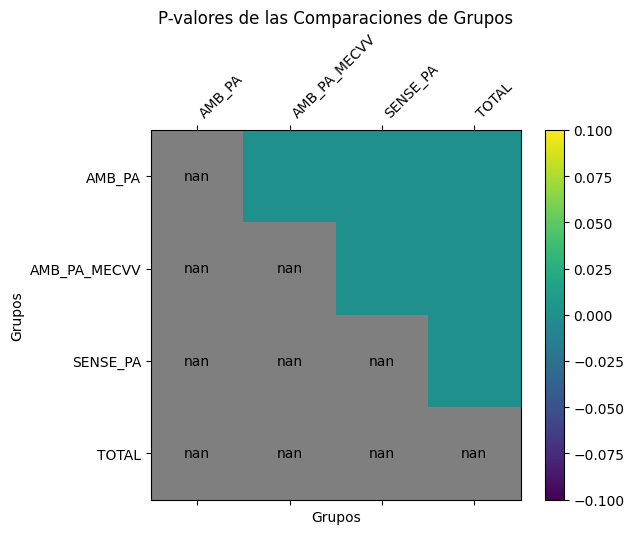

In [263]:
test_indepe_plot({'AMB_PA': AMB_PA['Urea'], 'AMB_PA_MECVV': AMB_PA_MECVV['Urea'], 'SENSE_PA': SENSE_PA['Urea'], 'TOTAL': TOTAL['Urea']})

NORMALITAT: Tots els grups, menys el quart (TOTAL), segueixen una distribució normal

### Filtrat glomerular CDK-EPI

In [264]:
AMB_PA.loc[:, 'FGE CDK-EPI'] = pd.to_numeric(AMB_PA['FGE CDK-EPI'], errors='coerce')

Mitjana_fg = AMB_PA['FGE CDK-EPI'].mean()
desviacio_estandard_fg = AMB_PA['FGE CDK-EPI'].std()

resultat = f"{Mitjana_fg:.2f} ± {desviacio_estandard_fg:.2f}"
print("Mitjana ± Desviació Estàndard de la filtració glomerular CDK-EPI:", resultat)

KeyError: 'FGE CDK-EPI'

In [265]:
AMB_PA_MECVV.loc[:, 'FGE CDK-EPI'] = pd.to_numeric(AMB_PA_MECVV['FGE CDK-EPI'], errors='coerce')

Mitjana_fg = AMB_PA_MECVV['FGE CDK-EPI'].mean()
desviacio_estandard_fg = AMB_PA_MECVV['FGE CDK-EPI'].std()

resultat = f"{Mitjana_fg:.2f} ± {desviacio_estandard_fg:.2f}"
print("Mitjana ± Desviació Estàndard de la filtració glomerular CDK-EPI:", resultat)

KeyError: 'FGE CDK-EPI'

In [266]:
SENSE_PA.loc[:, 'FGE CDK-EPI'] = pd.to_numeric(SENSE_PA['FGE CDK-EPI'], errors='coerce')

Mitjana_fg = SENSE_PA['FGE CDK-EPI'].mean()
desviacio_estandard_fg = SENSE_PA['FGE CDK-EPI'].std()

resultat = f"{Mitjana_fg:.2f} ± {desviacio_estandard_fg:.2f}"
print("Mitjana ± Desviació Estàndard de la filtració glomerular CDK-EPI:", resultat)

KeyError: 'FGE CDK-EPI'

In [267]:
TOTAL.loc[:, 'FGE CDK-EPI'] = pd.to_numeric(TOTAL['FGE CDK-EPI'], errors='coerce')

Mitjana_fg = TOTAL['FGE CDK-EPI'].mean()
desviacio_estandard_fg = TOTAL['FGE CDK-EPI'].std()

resultat = f"{Mitjana_fg:.2f} ± {desviacio_estandard_fg:.2f}"
print("Mitjana ± Desviació Estàndard de la filtració glomerular CDK-EPI:", resultat)

KeyError: 'FGE CDK-EPI'

#### Comparació distributiva

##### Normalitat i p-valor

NORMALITAT: Tots els grups, menys el primer (AMB_PA), segueixen una distribució normal

### Filtrat glomerular MDRD

In [268]:
AMB_PA.loc[:, 'FGE MDRD'] = pd.to_numeric(AMB_PA['FGE MDRD'], errors='coerce')

Mitjana_fgmd = AMB_PA['FGE MDRD'].mean()
desviacio_estandard_fgmd = AMB_PA['FGE MDRD'].std()

resultat = f"{Mitjana_fgmd:.2f} ± {desviacio_estandard_fgmd:.2f}"
print("Mitjana ± Desviació Estàndard de la filtració glomerular MDRD:", resultat)

KeyError: 'FGE MDRD'

In [269]:
AMB_PA_MECVV.loc[:, 'FGE MDRD'] = pd.to_numeric(AMB_PA_MECVV['FGE MDRD'], errors='coerce')

Mitjana_fgmd = AMB_PA_MECVV['FGE MDRD'].mean()
desviacio_estandard_fgmd = AMB_PA_MECVV['FGE MDRD'].std()

resultat = f"{Mitjana_fgmd:.2f} ± {desviacio_estandard_fgmd:.2f}"
print("Mitjana ± Desviació Estàndard de la filtració glomerular MDRD:", resultat)

KeyError: 'FGE MDRD'

In [270]:
SENSE_PA.loc[:, 'FGE MDRD'] = pd.to_numeric(SENSE_PA['FGE MDRD'], errors='coerce')

Mitjana_fgmd = SENSE_PA['FGE MDRD'].mean()
desviacio_estandard_fgmd = SENSE_PA['FGE MDRD'].std()

resultat = f"{Mitjana_fgmd:.2f} ± {desviacio_estandard_fgmd:.2f}"
print("Mitjana ± Desviació Estàndard de la filtració glomerular MDRD:", resultat)

KeyError: 'FGE MDRD'

In [271]:
TOTAL.loc[:, 'FGE MDRD'] = pd.to_numeric(TOTAL['FGE MDRD'], errors='coerce')

Mitjana_fgmd = TOTAL['FGE MDRD'].mean()
desviacio_estandard_fgmd = TOTAL['FGE MDRD'].std()

resultat = f"{Mitjana_fgmd:.2f} ± {desviacio_estandard_fgmd:.2f}"
print("Mitjana ± Desviació Estàndard de la filtració glomerular MDRD:", resultat)

KeyError: 'FGE MDRD'

#### Comparació distributiva

##### Normalitat i p-valor

In [272]:
test_indepe_plot({'AMB_PA': ['Glomerular Filtrate'], 'AMB_PA_MECVV': AMB_PA_MECVV['Glomerular Filtrate'], 'SENSE_PA': SENSE_PA['Glomerular Filtrate'], 'TOTAL': TOTAL['Glomerular Filtrate']})

ValueError: could not convert string to float: 'Glomerular Filtrate'